## Final Project Submission

Please fill out:
* Student name: Nancy Lopez
* Instructor name: 

# Phase 2 Project

## Introduction

This project data analysis will help identify what features in homes help increase the sale price of the home. The project includeds data cleaning, data exploratory, and model improvement. All leading to a final reccomendation based on the final model for our stockholders.

## Business Problem

A real estate investment company wants to develop a predictive model to estimate home prices in King County using KC Homes dataset. The company aims to provide accurate price estimates for potential homebuyers and sellers, as well as for their own investment decisions. They have historical data on various attributes of homes, such as location, size, condition, number of bedrooms, bathrooms, and more. This well help us answer what features would are good to consider in purchasing a home.

## Data 

Data used for this analysis is from the `King County House Sales dataset` is a dataset that contains information about real estate transactions in King County, Washington. It includes a variety of features or columns, such as property characteristics (square footage, number of bedrooms and bathrooms), house condition, grade, view, and information about the sale price.

### Data Prepearation/Exploration

Data preparation and exploration are fundamental steps in any data analysis or machine learning project. This phase involves getting the raw data ready for analysis, understanding its structure, and gaining insights before building models or drawing conclusions. Lets start off with importing necessary libraries needed followed by importing the data.

In [131]:
#import of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

In [132]:
#load dataframe
df_kc = pd.read_csv('data/kc_house_data.csv')
df_kc.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7399300360   5/24/2022  675000.0         4        1.0         1180   
1  8910500230  12/13/2021  920000.0         5        2.5         2770   
2  1180000275   9/29/2021  311000.0         6        2.0         2880   
3  1604601802  12/14/2021  775000.0         3        3.0         2160   
4  8562780790   8/24/2021  592500.0         2        2.0         1120   

   sqft_lot  floors waterfront greenbelt  ... sewer_system sqft_above  \
0      7140     1.0         NO        NO  ...       PUBLIC       1180   
1      6703     1.0         NO        NO  ...       PUBLIC       1570   
2      6156     1.0         NO        NO  ...       PUBLIC       1580   
3      1400     2.0         NO        NO  ...       PUBLIC       1090   
4       758     2.0         NO        NO  ...       PUBLIC       1120   

  sqft_basement sqft_garage sqft_patio yr_built  yr_renovated  \
0             0           0         40     1969             0   
1          1570           0        240     1950             0   
2          1580           0          0     1956             0   
3          1070         200        270     2010             0   
4           550         550         30     2012             0   

                                             address        lat       long  
0  2102 Southeast 21st Court, Renton, Washington ...  47.461975 -122.19052  
1  11231 Greenwood Avenue North, Seattle, Washing...  47.711525 -122.35591  
2  8504 South 113th Street, Seattle, Washington 9...  47.502045 -122.22520  
3  4079 Letitia Avenue South, Seattle, Washington...  47.566110 -122.29020  
4  2193 Northwest Talus Drive, Issaquah, Washingt...  47.532470 -122.07188  

[5 rows x 25 columns]

In [133]:
#exploring column names
df_kc.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

There are **23 features** in this dataframe in relation to sale price of each home. 

Just by taking a quick look at our columns there a few we can possibly drop, in order to keep a nice and simple dataframe for analysis. Looks like we have great data to help with our business problem.

***Let's take little deeper look at the prices statistical values.***

In [7]:
#get statistics from df_kc
df_kc.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  3.015500e+04  3.015500e+04  30155.000000  30155.000000  30155.000000   
mean   4.538104e+09  1.108536e+06      3.413530      2.334737   2112.424739   
std    2.882587e+09  8.963857e+05      0.981612      0.889556    974.044318   
min    1.000055e+06  2.736000e+04      0.000000      0.000000      3.000000   
25%    2.064175e+09  6.480000e+05      3.000000      2.000000   1420.000000   
50%    3.874011e+09  8.600000e+05      3.000000      2.500000   1920.000000   
75%    7.287100e+09  1.300000e+06      4.000000      3.000000   2619.500000   
max    9.904000e+09  3.075000e+07     13.000000     10.500000  15360.000000   

           sqft_lot        floors    sqft_above  sqft_basement   sqft_garage  \
count  3.015500e+04  30155.000000  30155.000000   30155.000000  30155.000000   
mean   1.672360e+04      1.543492   1809.826098     476.039396    330.211142   
std    6.038260e+04      0.567717    878.306131     579.631302    285.770536   
min    4.020000e+02      1.000000      2.000000       0.000000      0.000000   
25%    4.850000e+03      1.000000   1180.000000       0.000000      0.000000   
50%    7.480000e+03      1.500000   1560.000000       0.000000    400.000000   
75%    1.057900e+04      2.000000   2270.000000     940.000000    510.000000   
max    3.253932e+06      4.000000  12660.000000    8020.000000   3580.000000   

         sqft_patio      yr_built  yr_renovated           lat          long  
count  30155.000000  30155.000000  30155.000000  30155.000000  30155.000000  
mean     217.412038   1975.163953     90.922301     47.328076   -121.317397  
std      245.302792     32.067362    416.473038      1.434005      5.725475  
min        0.000000   1900.000000      0.000000     21.274240   -157.791480  
25%       40.000000   1953.000000      0.000000     47.405320   -122.326045  
50%      150.000000   1977.000000      0.000000     47.551380   -122.225585  
75%      320.000000   2003.000000      0.000000     47.669913   -122.116205  
max     4370.000000   2022.000000   2022.000000     64.824070    -70.074340

Theres a big difference in the max and were 75% of the data fall under for some columns there is a possibility of outliers.

**Columns:** price, bedrooms, bathrooms, sqft_lving, sqft_above, sqft_patio, sqft_garage
- Ex. `bedrooms` the max beds for a home is 13 but the 75% of our data fall under 4 beds with standard deviation of 1.

In [8]:
#take a look at the datatypes
df_kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

There are **different datatypes** we can see right away. 
ex. continous, discrete numerical and categorical.

In [228]:
#get the number of unique values in our dataframe
df_kc.nunique()

price             5199
bedrooms            13
bathrooms           21
sqft_living       1314
sqft_lot         12223
floors               7
waterfront           2
greenbelt            2
nuisance             2
view                 5
condition            5
grade               12
heat_source          7
sewer_system         4
sqft_above        1183
sqft_basement      459
sqft_garage        411
sqft_patio         526
yr_built           123
yr_renovated        82
dtype: int64

##### Based on the unique values there alot of gained insights:

- **Bedrooms**: Houses have between 1 and 13 bedrooms.
- **Bathrooms**: Properties have between 1 and 21 bathrooms.
- **Floors**: Houses have between 1 and 7 floors.
- **Waterfront, Greenbelt, Nusiance**: A binary category (0 or 1) representing whether the property is on the waterfront.
- **View**: Properties have between 0 and 5 view ratings.
- **Condition**: Houses are in varying conditions, with ratings from 1 to 5.
- **Grade**: Homes have different grades, ranging from 1 to 13.
- **Heat_Source**: There are seven different heat sources used in the properties.
- **Sewer_System**: Four categories exist for the sewer system used.
- **Sqft_Above**: The size of living space above ground ranges, with a maximum of 1187 square feet.
- **Sqft_Basement**: Basements vary in size, with a maximum of 459 square feet.
- **Sqft_Garage**: Garage sizes differ, with a maximum of 412 square feet.
- **Sqft_Patio**: The size of patios varies, with a maximum of 526 square feet.
- **Yr_Built**: Houses span across 123 different years of construction.
- **Yr_Renovated**: Properties show renovations over 83 different years.
- **Address**: There are 29560 unique addresses in the dataset.
- **Lat and Long**: Geographic coordinates for the properties indicate their location.



In [10]:
#check the count for null values in columns
df_kc.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

We can see the dataset contains **some missing values** in the 'heat_source' and 'sewer_system' columns. We will deal with them later on.

# Data Cleaning 

Next is the start of data cleaning. This includes handling missing values, dealing with duplicates, and addressing outliers. Cleaning ensures the data is accurate and reliable for analysis.

- Theres no need to further change column names, they are simple and easy to understand. 

The next step is to **drop** null values. There were very few missing values, and dropping the missing rows will not significantly impact our dataset.

In [134]:
#drop null values
df_kc = df_kc.dropna()

#chec to see if null values were dropped
df_kc.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
dtype: int64

Perfect! **All null values have been dropped.** Now lets drop some of those columns that we wont be needing for the direction I want to take to solve the business problem.

In [136]:
#dropping columns
df_kc.drop(['date', 'address', 'lat', 'long', 'id'], axis=1, inplace=True)

KeyError: "['date' 'address' 'lat' 'long' 'id'] not found in axis"

Now checking for **duplicates**.

In [137]:
#checking for duplicated rows
df_kc.duplicated().sum()

62

There are **62 duplicates** in the dataframe. We can go ahead and drop them.

In [138]:
#dropping duplicated rows
duplicate_rows = df_kc[df_kc.duplicated()]
df_kc.drop_duplicates(inplace=True)

In [139]:
#checking all duplicate rows have been dropped
df_kc.duplicated().sum()

0

##### Data Cleaned and Analysis-Ready

The dataset has undergone thorough cleaning and preparation. It is now free from inconsistencies and missing values, and is ready for analysis. Let's dive into the insights!


In [140]:
#saving clean data copy
df_cleaned = df_kc.copy()

Making a copy of the original dataset (`df_kc`) and store it in a new DataFrame named `df_cleaned`. This copy is will preserve the cleanliness and integrity of the data. This ensures the original dataset remains untouched and available for reference while working with the cleaned data in subsequent analyses or modeling processes.


# Exploratory Data: selecting baseline model feature

***Lets start off with taking a look at how prices of the homes are being distributed.***

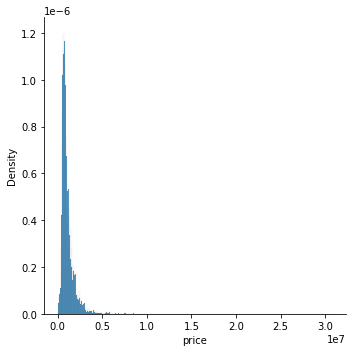

In [122]:
#distribution plot for price
sns.displot(df_cleaned['price'], stat="density");

As suspected the data is `skewed` to the right, we can remove outliers by using log to create a more rebust and accurate model to see if theres improvement.

#### Pair Plot Matrix
The next logical step is to examine a pair plot matrix. This visual representation of pairwise relationships between key variables allows us to uncover potential patterns, correlations, and outliers at a glance.

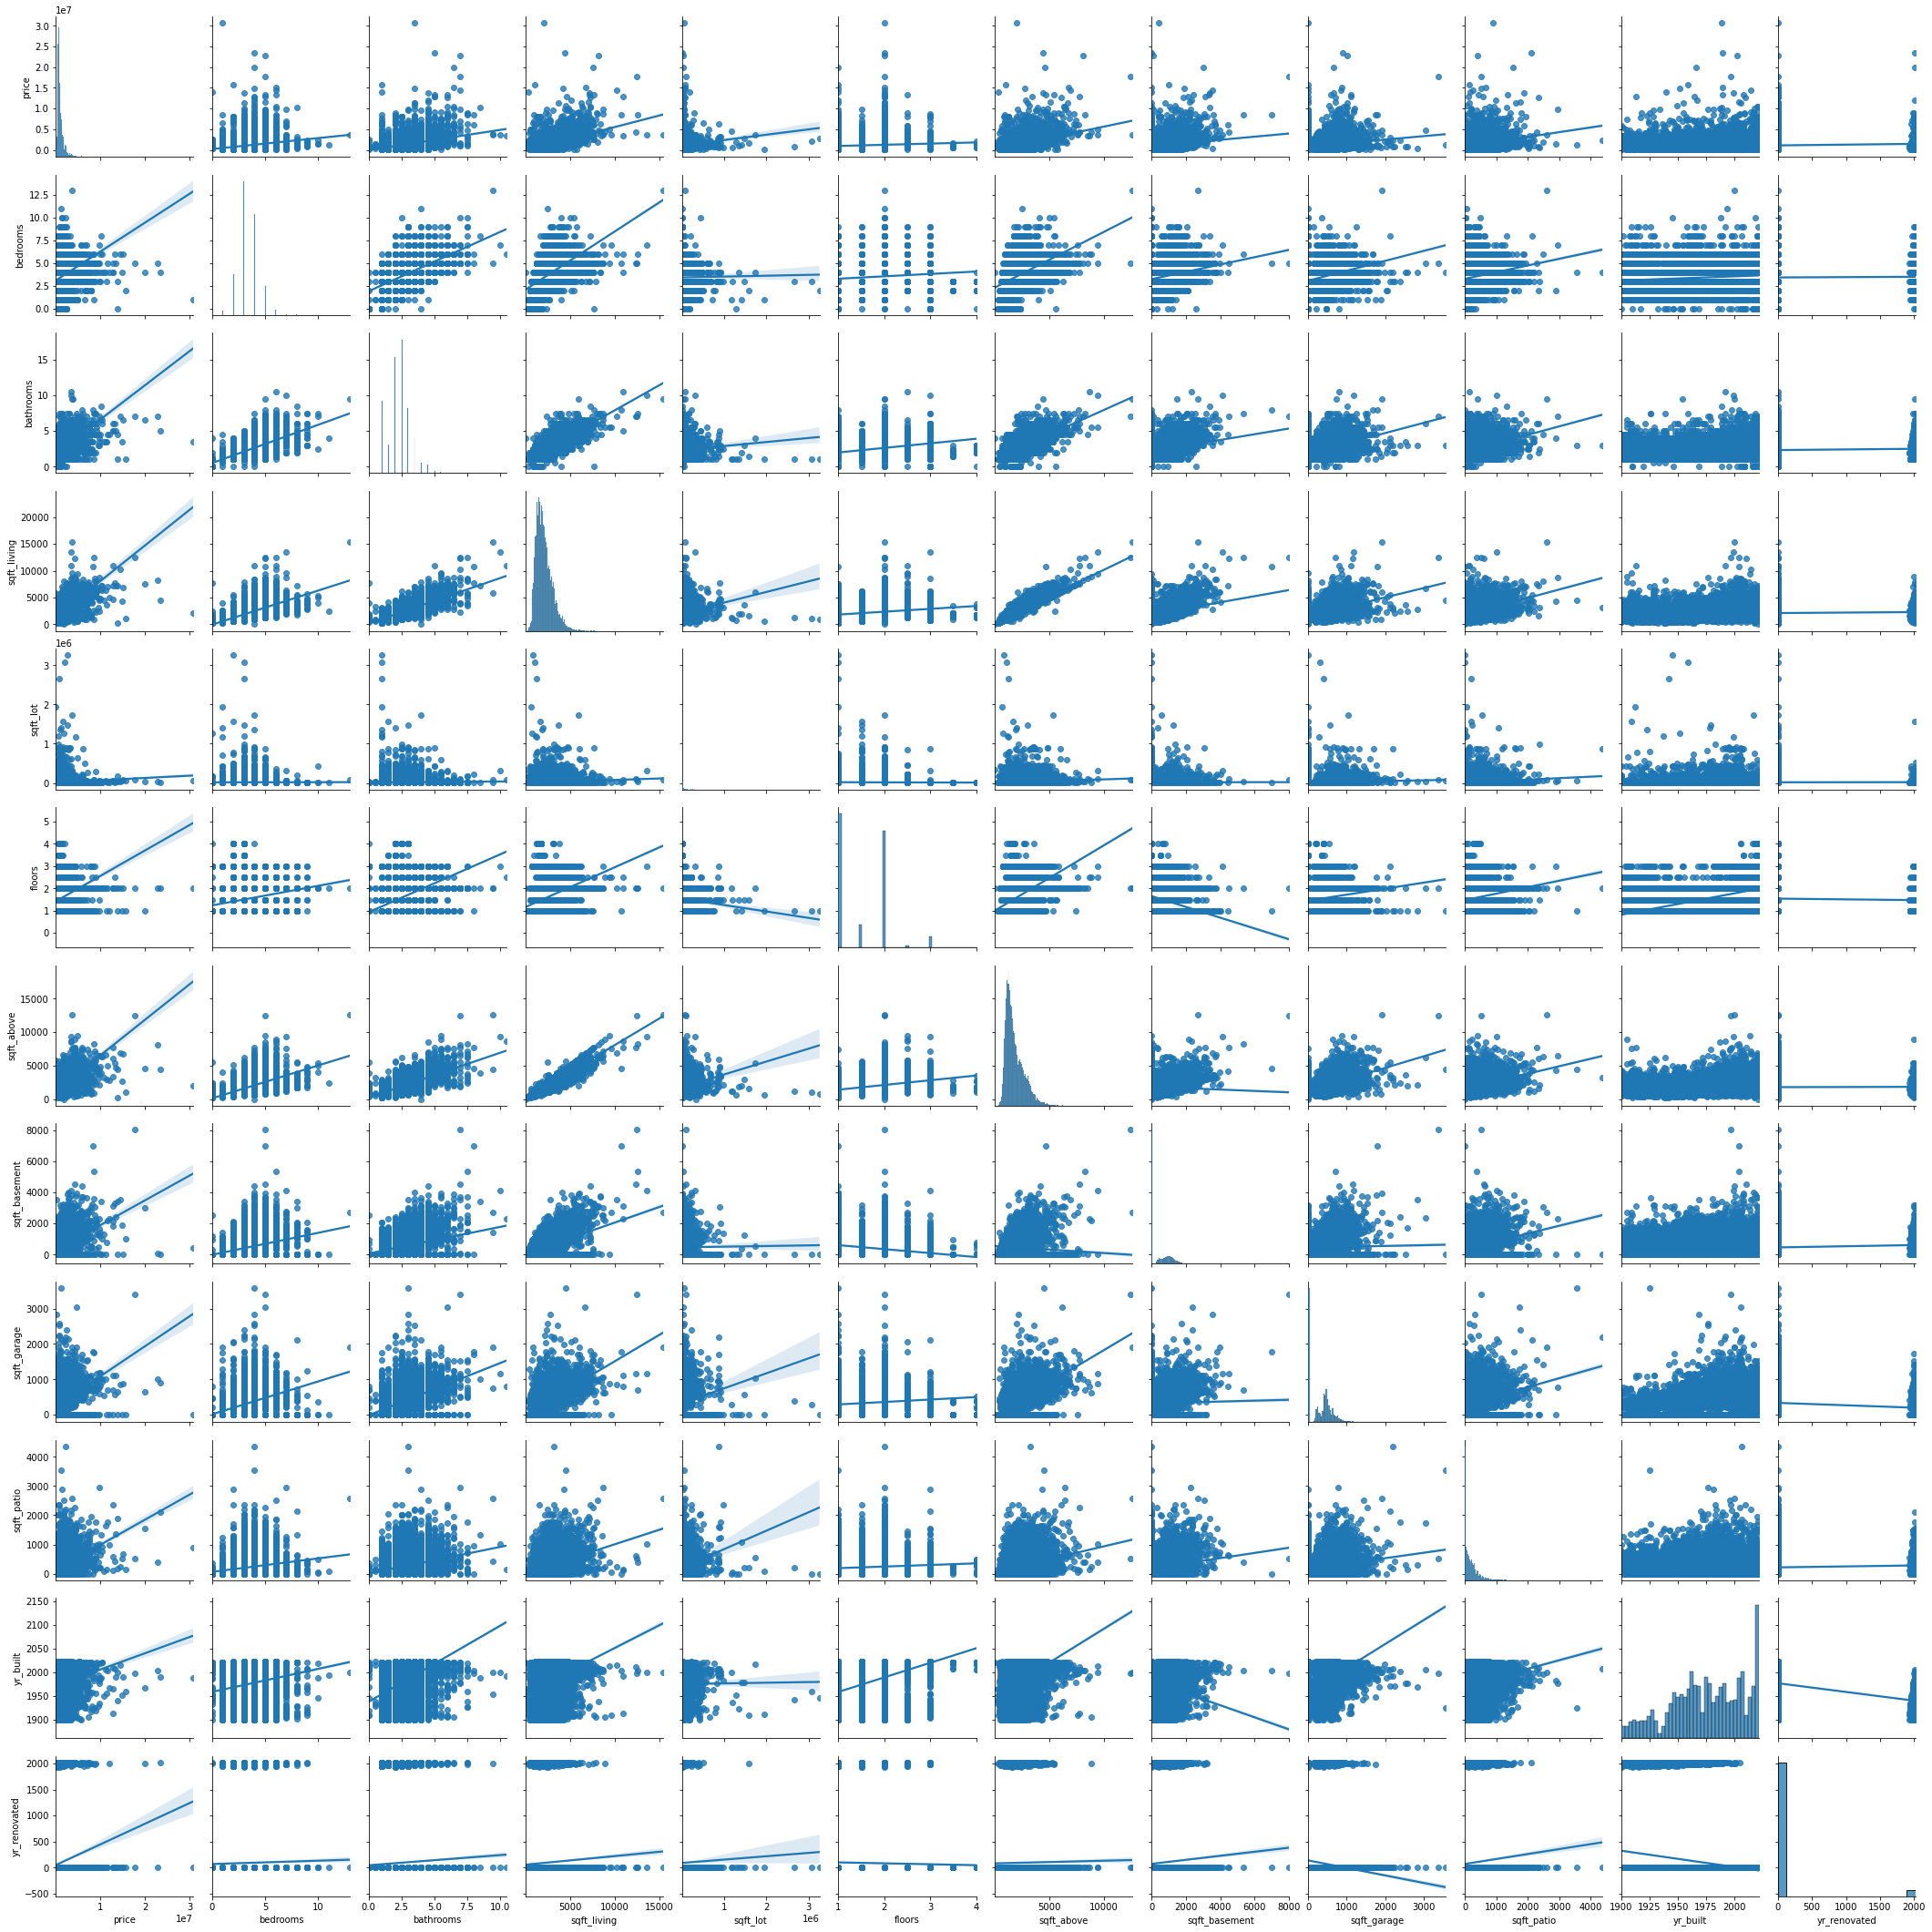

In [124]:
#create a pair plot matrix
sns.pairplot(df_cleaned, kind='reg')
plt.show()

The pair plot provides a visual overview of the relationships between different features. Scatter plots on the diagonal show the distribution of each individual feature.

A heatmap is a graphical representation of data in a matrix format where individual values are represented as colors. This helps visualize relationships between two categorical variables or measure the magnitude of a numeric variable across two categorical variables.

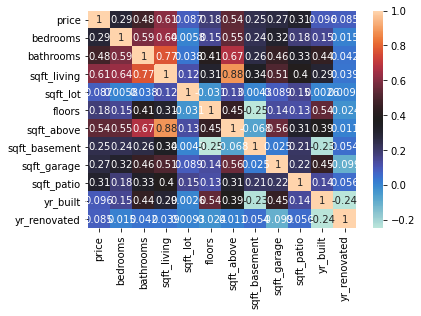

In [17]:
#create a heat map of df_cleaned 
sns.heatmap(df_cleaned.corr(), annot=True, cmap='icefire');

Pair plot and heat map is showing us that `'sqft_living'` has a really high correlation with `'price'`. We can possibly use this feature in our baseline model. 
- Keeping in mind 'sqft_living' **has correlation** with 'bathrooms', 'bedrooms' and 'sqft_above'.

In [141]:
#calculate correlation coefficients with the price
corr = df_cleaned.corr()['price']

#display correlation coefficients in descending order
print(corr.sort_values(ascending=False))

price            1.000000
sqft_living      0.611389
sqft_above       0.541321
bathrooms        0.482142
sqft_patio       0.314264
bedrooms         0.290263
sqft_garage      0.265544
sqft_basement    0.245799
floors           0.181160
yr_built         0.096133
sqft_lot         0.086978
yr_renovated     0.085438
Name: price, dtype: float64


##### 'sqft_living' as dependent variable for Baseline Model

The decision to include `'sqft_living'` as part of the baseline model is based on its high positive correlation with the target variable 'price.' The correlation coefficient between 'sqft_living' and 'price' is approximately `0.611`, indicating a strong linear relationship.

A high positive correlation suggests that as the living area square footage increases, the property's price tends to increase as well. Therefore, 'sqft_living' is a promising feature for predicting housing prices in our baseline model.

# Baseline Model

In [160]:
df = df_cleaned.copy()

We are going to start with a baseline model using `'sqft_living'`. We are going to look at a scatterplot to show us the relationship between `'price'` and `'sqft_living'`.
###### We can build upon this foundation by incorporating additional features and refining the model as needed during further analysis.



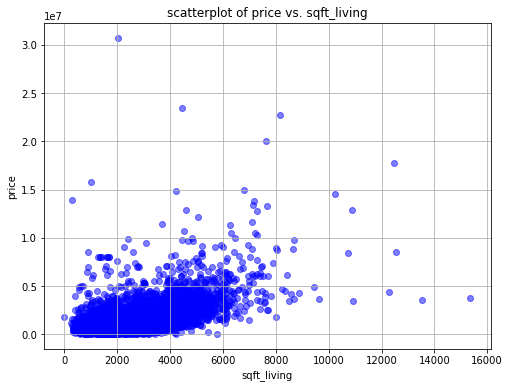

In [143]:
#plot the scatterplot price vs sqft_lving
plt.figure(figsize=(8, 6))
plt.scatter(df['sqft_living'], df['price'], alpha=0.5, marker='o', color='b')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('scatterplot of price vs. sqft_living')
plt.grid(True)
plt.show()

The scatterplot has shown us there a linear relationship between 'price' and 'sqft_living'. This is great to see, we can now move on with our baseline model in confidence.

In [144]:
#creating the baseline model using OLS
X_baseline = df['sqft_living']  #independent variable
Y_baseline = df['price']  #dependent variable

#fit the model
baseline_model = sm.OLS(Y_baseline, sm.add_constant(X_baseline)).fit()

#print the model summary
print(baseline_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                 1.794e+04
Date:                Mon, 11 Sep 2023   Prob (F-statistic):               0.00
Time:                        05:35:58   Log-Likelihood:            -4.4737e+05
No. Observations:               30049   AIC:                         8.947e+05
Df Residuals:                   30047   BIC:                         8.948e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -7.79e+04   9754.746     -7.986      

In [22]:
#calculating overall error of model
mae = baseline_model.resid.abs().sum() / len(Y_baseline)
mae

395732.6946735167

### Baseline Model Insights

Based from the baseline model we can quickly see the model is statistically significant. 
- **R-squared:** The R-squared value is 0.374, indicating that around 37.4% of the variance in the 'price' can be explained by the 'sqft_living'.
- **sqft_living:** For every sqft increase the price increases by $561. 
- **Skew and Kurtosis:** These values describe the shape of the residual distribution. High skewness (8.221)
- **Overall Error**: The Mean Absolute Error (MAE) is calculated to assess the overall error of the model's predictions. The MAE is approximately 395,732.69, indicating that, on average, the model's predictions deviate from the actual prices by this amount.

This baseline model provides some insights into the relationship between square footage and housing prices, but it is limited by its simplicity and the fact that it does not account for other potentially important variables that influence housing prices.

**Next lets further inspect regression line and sqft_living distribution.**

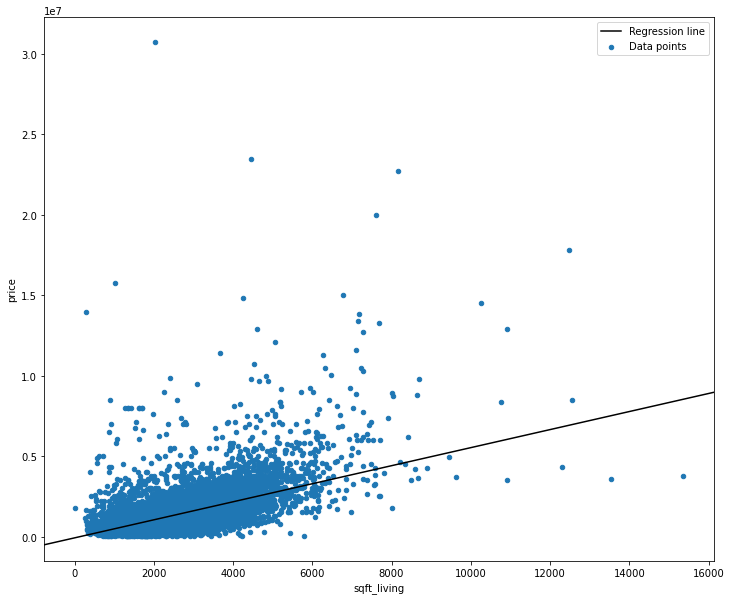

In [145]:
#scatterplot with regression line
fig, ax = plt.subplots(figsize=(12,10))
df.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=baseline_model, label="Regression line", ax=ax, color="black")
ax.legend()
plt.show()

The regressionline visually shows us the linear relationship between `price` and `sqft_living`.

- **Positive Linear Relationship**: The scatterplot reveals a clear upward trend, indicating a positive linear connection between square footage ('sqft_living') and housing prices. As the size of the living space increases, houses tend to become more expensive.

- **Outliers**: Notably, there are outliers, especially among properties with exceptionally high square footage and prices.

- **Regression Line**: The black regression line represents a best-fit linear model that summarizes the overall relationship between square footage and prices. Suggesting how much prices are estimated to rise for each additional square footage unit.

- **Scatter and Spread**: The spread of data points around the regression line implies that factors beyond square footage influence housing prices. This suggests we need a more comprehensive model or additional features to better predict price variations.

In summary, the scatterplot with the regression line highlights the positive linear relationship between square footage and housing prices. It also calls attention to outliers and suggests that the model's predictive power may be limited when using square footage as the sole predictor, indicating the potential need for a more complex model or additional features to enhance price prediction.

### Exploring Outliers
Exploring outliers will help us understand the best way to remove them. This can help us build a stronger model.

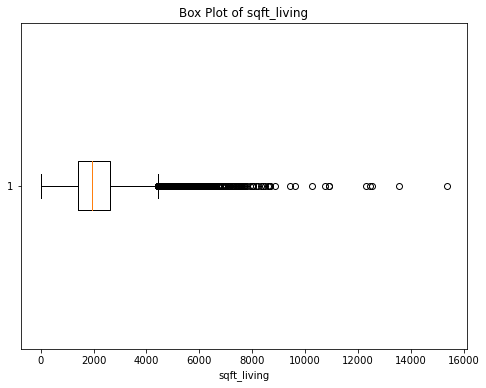

In [127]:
#plot a box plot for 'sqft_living' 
plt.figure(figsize=(8, 6))
plt.boxplot(df['sqft_living'], vert=False)
plt.xlabel('sqft_living')
plt.title('Box Plot of sqft_living')
plt.show()

A **box plot** is great way to visually see if there are any outliers. The box plot above shows us we have outiers in `'sqft_living'`. Removing the outliers may help improve baseline model.

In [146]:
#calculate the first and third quartiles (Q1 and Q3)
Q1 = df['sqft_living'].quantile(0.25)
Q3 = df['sqft_living'].quantile(0.75)

#calculate the interquartile range (IQR)
IQR = Q3 - Q1

#define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#remove outliers
df_filtered = df[(df['sqft_living'] >= lower_bound) & (df['sqft_living'] <= upper_bound)]

#now we can use df_filtered with no outliers

In [147]:
#sqft_living with no outliers model
X = df_filtered['sqft_living']  #independent variable
Y = df_filtered['price']  #dependent variable

#fit the model
model_filtered = sm.OLS(Y, sm.add_constant(X)).fit()

#print the model summary
print(model_filtered.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                 1.100e+04
Date:                Mon, 11 Sep 2023   Prob (F-statistic):               0.00
Time:                        05:36:26   Log-Likelihood:            -4.3153e+05
No. Observations:               29326   AIC:                         8.631e+05
Df Residuals:                   29324   BIC:                         8.631e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.358e+05   9331.041     14.549      

### Filtered Model vs Baseline Model:

**R-squared:**
   - Filtered Model: R-squared is `0.273`, indicating that around 27.3% of the variation in the target variable (price) is explained by the predictor (sqft_living).
   - Baseline Model: R-squared is `0.374`, indicating that around 37.4% of the variation in the target variable (price) is explained by the predictor (sqft_living).

**Baseline Model** outperforms Filtered Model in terms of R-squared, F-statistic, and AIC/BIC. This suggests that Baseline Model provides a better fit to the data and explains more of the variation in the target variable as of now. **Removing outliers in 'sqft_living' was not the best.**

As we saw previouly `'price'` was heavily skewed. Next let's see if performing log transformation on 'price' can further improve our model. 

## log_price Model

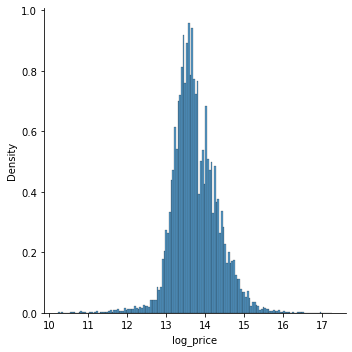

In [161]:
#apply log transformation to the 'price' column
df['log_price'] = np.log(df['price'])

#plot price distribution
sns.displot(df['log_price'], stat="density");

We can now see a **normal distribution** for `'price'` after performing log transformation.

In [162]:
#create variables to log_price model
y_log = df['log_price'] #dependent variable
X = X_baseline.copy() #independent varialble

#fit the model
y_log_model = sm.OLS(y_log, sm.add_constant(X))
y_log_results = y_log_model.fit()

#print the model
print(y_log_results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                 1.902e+04
Date:                Mon, 11 Sep 2023   Prob (F-statistic):               0.00
Time:                        05:42:26   Log-Likelihood:                -18993.
No. Observations:               30049   AIC:                         3.799e+04
Df Residuals:                   30047   BIC:                         3.801e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.9490      0.006   2061.925      

### Log Price Model vs Baseline Model:

- **R-squared:** Log Price Model has a slightly higher R-squared value (0.388) compared to Baseline Model (0.374). This suggests that Log Price Model explains a **slightly larger** proportion of the variance in the dependent variable.

- **Coefficient for 'sqft_living':** Log Price Model, for every 1-unit increase in 'sqft_living', the 'log_price' increases by 0.0004%.

- **AIC:** The AIC values are significantly lower for Log Price Model compared to Baseline Model. A lower AIC suggests that Log Price Model is a better fit for the data.

##### We are going to keep using log_price as our dependent variable for future models.

In [163]:
#drop column price
df = df.drop('price', axis=1)

# Exploring Numerical Columns

In [151]:
#calculate correlation coefficients with the price
corr = df.corr()['log_price']

#display correlation coefficients in descending order
print(corr.sort_values(ascending=False))

log_price        1.000000
sqft_living      0.622642
sqft_above       0.548771
bathrooms        0.517129
bedrooms         0.346214
sqft_patio       0.310225
sqft_garage      0.285056
sqft_basement    0.250518
floors           0.236245
yr_built         0.121421
sqft_lot         0.084704
yr_renovated     0.076230
Name: log_price, dtype: float64


Based on correlation coefficients I am considering adding:

**sqft_above**: Another measure of the living area, 'sqft_above' also has a positive correlation of 0.548771 with the log of the price. It represents the living area above ground level.

**bathrooms**: This feature has a correlation of 0.517129 with the log of the price. The number of bathrooms is often a key factor in determining a home's value.

**bedrooms**: While not as strongly correlated as some other features, 'bedrooms' still has a correlation of 0.346214 with the log of the price. The number of bedrooms can influence the overall size and appeal of a house.

**sqft_patio**: This feature has a correlation of 0.310225 with the log of the price. If a house has a patio, its size can contribute to its value.

**floors**: The number of floors in a house has a correlation of 0.236245 with the log of the price. Houses with multiple floors may have different price ranges compared to single-story houses.

#### Pair Plot Matrix of possible features selection
This will help make informed decisions about feature selection.

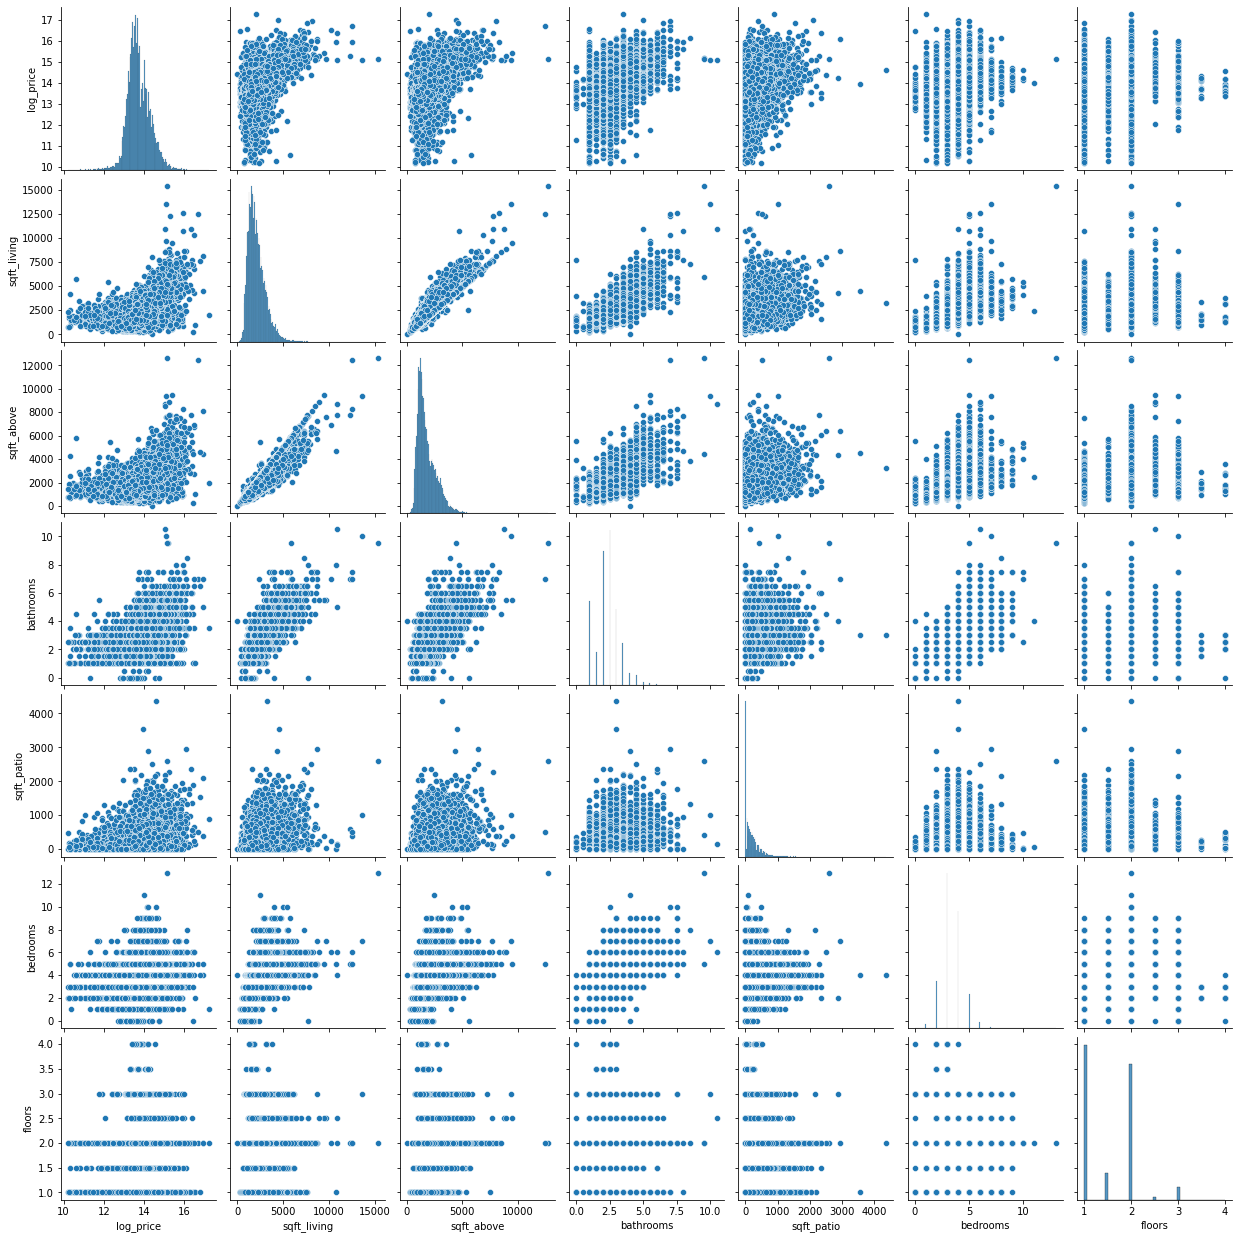

In [33]:
#create a pair plot matrix
selected = ['log_price', 'sqft_living', 'sqft_above', 'bathrooms', 'sqft_patio', 'bedrooms', 'floors']
sns.pairplot(df[selected])
plt.show()


**Observations from Pair Plot:**
After generating a pair plot of the selected features, we can make the following observations:

1. **sqft_living vs. sqft_above:** There seems to be a strong positive linear relationship between these two variables. As the living area (sqft_living) increases, the above-ground area (sqft_above) also tends to increase proportionally.

2. **sqft_living vs. bathrooms:** There appears to be a positive correlation between the living area and the number of bathrooms. Larger homes (higher sqft_living) tend to have more bathrooms.

3. **sqft_living vs. sqft_patio:** There doesn't seem to be a strong correlation between living area and patio area. The points are scattered without a clear linear trend.

4. **sqft_living vs. bedrooms:** Similar to bathrooms, there seems to be a positive correlation between living area and the number of bedrooms. Larger homes (higher sqft_living) tend to have more bedrooms.

5. **sqft_living vs. floors:** The scatter plot suggests that there is no strong linear correlation between living area and the number of floors.

6. **bathrooms vs. sqft_above:** There doesn't seem to be a strong correlation between the number of bathrooms and above-ground area. The points are scattered without a clear linear trend.

7. **bathrooms vs. sqft_patio:** Similarly, there is no strong correlation between the number of bathrooms and patio area.

8. **bathrooms vs. bedrooms:** The scatter plot shows some correlation between the number of bathrooms and bedrooms. However, there are a few outliers where homes have a high number of bathrooms relative to the number of bedrooms.

9. **bathrooms vs. floors:** The plot suggests that there is no strong correlation between the number of bathrooms and the number of floors.

10. **sqft_above vs. sqft_patio:** There doesn't seem to be a strong correlation between above-ground area and patio area.

11. **sqft_above vs. bedrooms:** The scatter plot shows some correlation between above-ground area and the number of bedrooms.

12. **sqft_above vs. floors:** There is no strong linear correlation between above-ground area and the number of floors.

13. **sqft_patio vs. bedrooms:** There appears to be no strong correlation between patio area and the number of bedrooms.

14. **sqft_patio vs. floors:** Similarly, there is no strong correlation between patio area and the number of floors.

Based on these observations I will be adding and changing features to best avoid multicollinearity. 

With `'sqft_living'` and `'sqft_above'` I will add a new feature as `'total_sqft'` it will include 'sqft_above' and 'sqft_basement' as one feature and will not include 'sqft_living' in our model.

##### Exploring Box Plots for Selected Features 

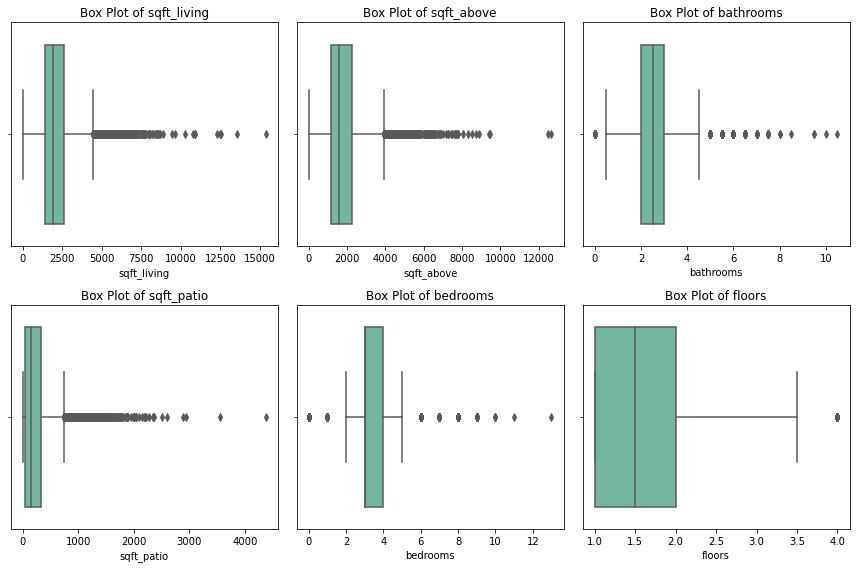

In [164]:
#list of selected features
selected_features = ['sqft_living', 'sqft_above', 'bathrooms', 'sqft_patio', 'bedrooms', 'floors']

#create box plots for each selected feature
plt.figure(figsize=(12, 8))

for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 3, i)  #2 rows, 3 columns of subplots
    sns.boxplot(data=df, x=feature, palette='Set2')
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)

#spacing between subplots
plt.tight_layout()  
plt.show()

Based on each box plot we have found:

- **sqft_living**: Shows a wide range of values, with some potential outliers on the higher end.

- **sqft_above**: A similar distribution pattern to 'sqft_living,' indicating that these two features might be closely related. 

- **bathrooms**: We can see. majority of houses have a relatively small number of bathrooms, with some outliers on the higher side.

- **sqft_patio**: There's a variability in patio sizes, with potential outliers indicating larger patios.

- **bedrooms**: Most houses have a moderate number of bedrooms, while a few have significantly more, potentially indicating larger properties.

- **floors**: This box plot represents the number of floors in the houses. It reveals that single-floor houses are common, with some exceptions that have more floors.

##### Next Steps:
- Create a new feature `'sqft_total'`. Since 'sqft_living' and 'sqft_above' have a close relationship, I will take the total of 'sqft_above' + 'sqft_basement' to get 'sqft_total'.
- We can see there's a wide distribution of floors. Maybe the larger the home means more floors or bedrooms?

### Creating new feature 'sqft_total'

In [165]:
#adding new column 'sqft_total'
df['sqft_total'] = df['sqft_above'] + df['sqft_basement']

***Next step look at 'floors' and 'bedrooms' distribution***

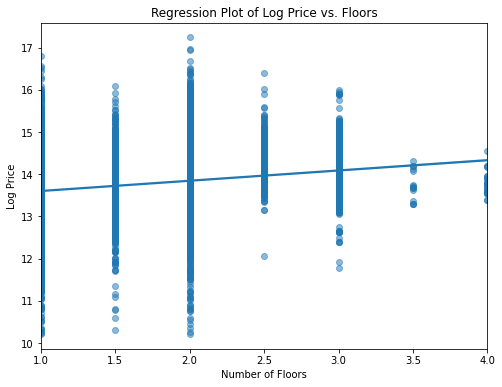

In [226]:
#regression plot log price and floors
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='floors', y='log_price', scatter_kws={'alpha':0.5})
plt.xlabel('Number of Floors')
plt.ylabel('Log Price')
plt.title('Regression Plot of Log Price vs. Floors')
plt.show()

Based on the graph showing the relationship between `'floors'` and `'log_price'`:

- **Price Distribution**: The majority of housing prices are concentrated within a specific range.

- **Regression Line**: There's a general upward line. As the number of floors increases, the housing prices tend to rise as well. This suggests that the number of floors might be a relevant factor in predicting housing prices.

`'floors'` will be used as feature in our model

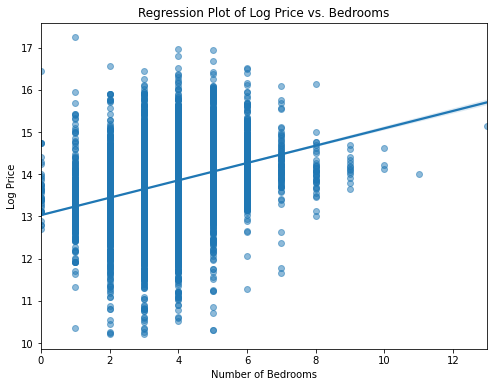

In [227]:
#regression plot log price and bedrooms
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='bedrooms', y='log_price', scatter_kws={'alpha':0.5})
plt.xlabel('Number of Bedrooms')
plt.ylabel('Log Price')
plt.title('Regression Plot of Log Price vs. Bedrooms')
plt.show()

Based on the plot above the spread of data points and regression line it reveals the variability in the relationship.

`'bedrooms'` will be used as feature in our model

## Model 1: adding features
`'sqft_living', 'sqft_above', 'bedrooms', 'floors'` will be added in our next model.

In [171]:
#creating variables to Model 1
y_log = df['log_price'] #dependent variable
X_model1 = df[['sqft_living', 'sqft_above', 'bedrooms', 'floors']] #independent variable

#fit the model
model_1 = sm.OLS(y_log, sm.add_constant(X_model1))
model1_results = model_1.fit()

#print model summary
print(model1_results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     4891.
Date:                Mon, 11 Sep 2023   Prob (F-statistic):               0.00
Time:                        05:49:42   Log-Likelihood:                -18828.
No. Observations:               30049   AIC:                         3.767e+04
Df Residuals:                   30044   BIC:                         3.771e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.9866      0.011   1143.102      

#### Model 1 Insights:
- **R-squared**: The R-squared value is approximately 0.394, indicating that this model accounts for about 39.4% of the variance in 'log_price.' This suggests that the selected independent variables explain a substantial portion of the variation in housing prices.

- **Adjusted R-squared**: The adjusted R-squared value remains at 0.394, considering the model's degrees of freedom. It reaffirms the model's explanatory power.

- **F-statistic**: The F-statistic is 4891, with a very low p-value (0.00). This indicates that the overall model is statistically significant.

- **Log-Likelihood**: The log-likelihood value is -18828, representing the maximized log-likelihood function.

- **AIC and BIC**: The AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) values help assess model fit. Lower values are preferred, and in this case, they indicate a relatively good model fit.

##### Coefficients

- **Constant (Intercept)**: The constant term is 12.9866, representing the estimated 'log_price' when all other independent variables are zero.

- **sqft_living**: The coefficient for 'sqft_living' is 0.0004, implying that, on average, each unit increase in square footage leads to an increase of 0.0004%.

- **sqft_above**: The coefficient for 'sqft_above' is -3.932e-05, indicating that, on average, each unit increase in square footage above ground level leads to a decrease.

- **bedrooms**: The coefficient for 'bedrooms' is -0.0487, suggesting that, on average, each additional bedroom is associated with a decrease of 0.0487.

- **floors**: The coefficient for 'floors' is 0.0582, indicating that, on average, each additional floor is associated with an increase of 0.0582.

- **Condition Number**: The large condition number (1.4e+04) may indicate potential multicollinearity among the independent variables.

**The condition number to Model 1 is large, meaning there might be multicollinearity and should be assesed.**

### Checking to see if selected values are correlated with one another

In [172]:
import pandas as pd

#create correlation matrix
correlation_matrix = X_model1.corr()

#set the correlation threshold
correlation_threshold = 0.7

#find highly correlated feature pairs
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            highly_correlated_pairs.append(pair)

#print the highly correlated feature pairs
for pair in highly_correlated_pairs:
    print(f"Highly correlated pair: {pair[0]} - {pair[1]} (Correlation: {correlation_matrix.loc[pair[0], pair[1]]:.2f})")



Highly correlated pair: sqft_living - sqft_above (Correlation: 0.88)


**As suspected:** 'sqft_living' and 'sqft_above' are highly correlated, it will be best to add new feature `'sqft_total'` that was created.

##### This new feature represents the total square footage of both above-grade and basement areas.

### Model 2: using new feature 'sqft_total'

In [229]:
#creating the baseline model using OLS
X_model2 = df[['sqft_total', 'bedrooms', 'floors']]  #independent variable
Y = df['log_price']  #dependent variable

#fit the model
model_2 = sm.OLS(Y, sm.add_constant(X_model2)).fit()

#print the model summary
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     6329.
Date:                Tue, 12 Sep 2023   Prob (F-statistic):               0.00
Time:                        09:38:47   Log-Likelihood:                -19004.
No. Observations:               30049   AIC:                         3.802e+04
Df Residuals:                   30045   BIC:                         3.805e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8722      0.011   1148.800      0.0

##### Model Comparison
**Model 2:**
- R-squared: 0.387
- Features: 'sqft_total', 'bedrooms', 'floors'
- AIC: 3.802e+04

###### Coefficients:
- 'sqft_total': Is approximately 0.0004 meaning, each additional square foot of total space, there is an expected increase of approximately 0.0004 in the log-transformed price.

- 'bedrooms': Is -0.0249, an increase in the number of bedrooms is associated with a decrease in the log-transformed price.

- 'floors': Is 0.0909, suggesting that an increase in the number of floors is correlated with a higher log-transformed price.


**Model 1 vs Model 2:**
- Model 2 has a `lower AIC`, which measures model goodness-of-fit, suggesting it may be a better fit for the data, despite having fewer features.

**In order to further improve model we need to add categorical features. Adding categorical features to the model is essential. Categorical variables contain valuable information that can influence the outcome you're trying to predict.**

### Exploring and Transforming Categorical Variables

To work with categorical data and prepare it for modeling, a copy of the original DataFrame will be created. This will ensure the original data remains unchanged and available for reference. The new dataframe, `df_categorical`, will be used for further processing and encoding of categorical features.

In [189]:
#copying DataFrame and Preparing Categorical Data
df_categorical = df.copy()

In [176]:
#setting categorical variables to start further exlopring columns
categorical_columns = df_categorical.select_dtypes(include='object')

#taking a look at categorical columns
categorical_columns.head(10)

waterfront greenbelt nuisance     view condition      grade  heat_source  \
0         NO        NO       NO     NONE      Good  7 Average          Gas   
1         NO        NO      YES  AVERAGE   Average  7 Average          Oil   
2         NO        NO       NO  AVERAGE   Average  7 Average          Gas   
3         NO        NO       NO  AVERAGE   Average   9 Better          Gas   
4         NO        NO      YES     NONE   Average  7 Average  Electricity   
5         NO        NO      YES     NONE   Average  7 Average  Electricity   
6         NO        NO       NO  AVERAGE      Good   9 Better          Oil   
7         NO        NO       NO     NONE   Average     8 Good          Gas   
8         NO        NO       NO     NONE   Average     8 Good          Gas   
9         NO        NO       NO  AVERAGE   Average     8 Good          Gas   

  sewer_system  
0       PUBLIC  
1       PUBLIC  
2       PUBLIC  
3       PUBLIC  
4       PUBLIC  
5       PUBLIC  
6      PRIVATE  
7       PUBLIC  
8       PUBLIC  
9       PUBLIC

**Insights from the table:**
- Waterfront: Indicates whether the property is located by the waterfront (YES/NO).
- Greenbelt: Indicates whether the property is adjacent to a greenbelt area (YES/NO).
- Nuisance: Indicates whether the property has a nuisance factor (YES/NO).
- View: Represents the level of view quality (NONE, AVERAGE, GOOD).
- Condition: Describes the overall condition of the property.
- Grade: Represents the grade assigned to the property.
- Heat Source: Indicates the source of heat for the property (Gas, Oil, Electricity).
- Sewer System: Indicates the type of sewer system (PUBLIC, PRIVATE).

**Next further explore distribution to better understand columns.**

### Distribution of Categorical Features

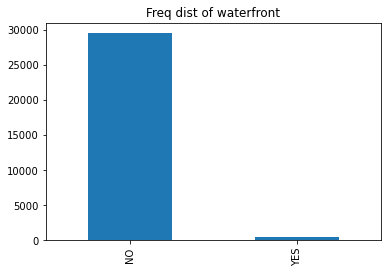

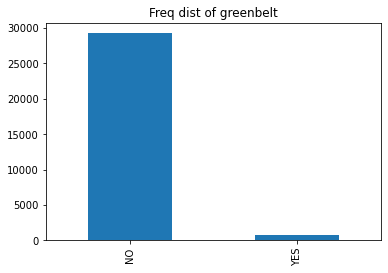

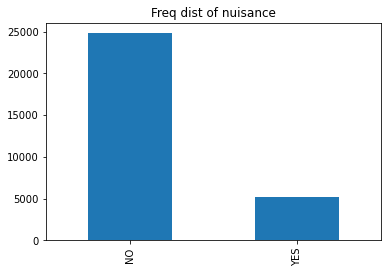

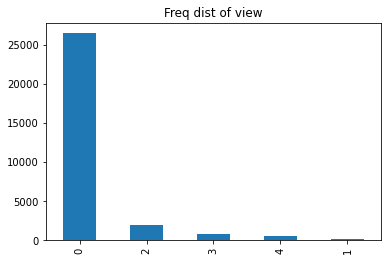

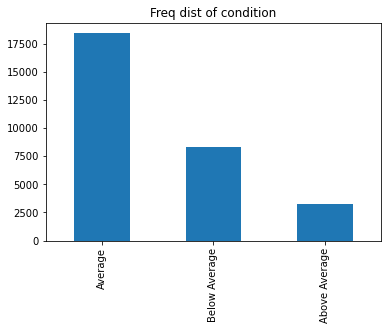

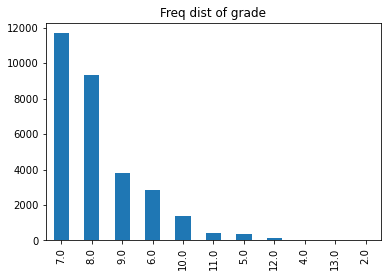

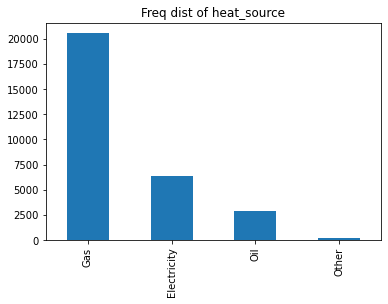

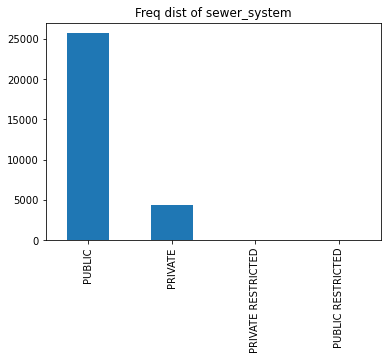

In [230]:
#going through each object features and look at the distributions.
for col in categorical_columns:
    df_categorical[col].value_counts().plot.bar(title = 'Freq dist of ' + col)
    plt.show()

#### Bar plots insights:

- **Waterfront:** The distribution plot indicates that a vast majority of instances are categorized as 'No waterfront,' while 'Waterfront' properties are notably less common. 

- **Greenbelt:** Most of the properties do not have a 'Greenbelt' attribute, making it the dominant category.

- **Nuisance:** The distribution shows that a significant number of properties have 'No nuisance' reported, with instances of 'Nuisance' being fewer in comparison.

- **View:** Instances with 'No view' are substantially more common than those with different view levels. Views are skewed towards the '0' category.

- **Condition:** The majority of properties are in 'Average' condition, while instances in 'Good' or 'Fair' condition are comparatively lower in number. They will be change into 3 categories later.

- **Grade:** The distribution of grades shows that properties with '7' and '8' grades are the most common, while higher and lower grades are less frequent.
 
- **Heat Source:** Properties primarily rely on 'Electricity' and 'Gas' as heat sources, with 'Electricity' being more prevalent.

- **Sewer System:** The distribution plot indicates that most properties are connected to the 'Sewer connected' system, while 'Septic system' connections are less frequent.

##### From these insights we can move foward to explore more 'waterfront', 'view', 'condition', 'grade', 'heat_source' and 'sewer_system'
- Make note of 'heat_source', possibly adding a 'other'. (ex. 'gas' , 'electricity' and 'other')

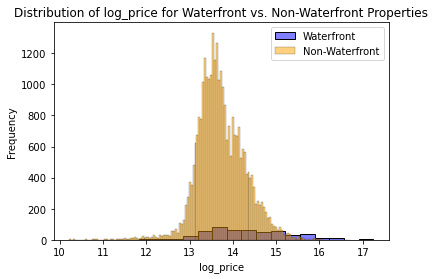

In [54]:
#filtering the dataframe for properties with and without waterfront
waterfront_properties = df_categorical[df_categorical['waterfront'] == 'YES']
non_waterfront_properties = df_categorical[df_categorical['waterfront'] == 'NO']

#creating a combined distribution plot
sns.histplot(data=waterfront_properties, x='log_price', label='Waterfront', color='blue', alpha=0.5)
sns.histplot(data=non_waterfront_properties, x='log_price', label='Non-Waterfront', color='orange', alpha=0.5)

#set labels and title
plt.xlabel('log_price')
plt.ylabel('Frequency')
plt.title('Distribution of log_price for Waterfront vs. Non-Waterfront Properties')
plt.legend()

#show plot
plt.show()

As suspected, based on the graph we can see the distribution of `waterfront properties` is a flat distribution. You would expect to see a relatively constant line with no change. Exlploring waterfront properties alone may give us a better understanding of distrubution.

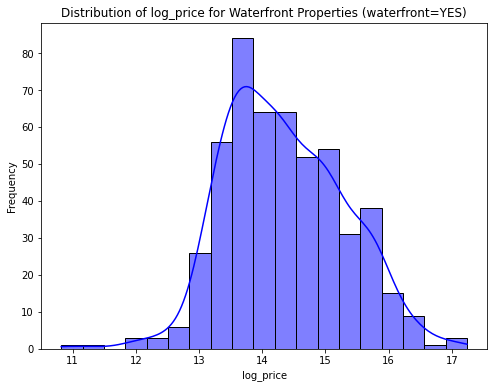

In [178]:
#filter the DataFrame for 'waterfront' = 'YES'
waterfront_yes = df[df['waterfront'] == 'YES']

#distribution plot for 'log_price'
plt.figure(figsize=(8, 6))
sns.histplot(waterfront_yes['log_price'], kde=True, color='blue')
plt.title('Distribution of log_price for Waterfront Properties (waterfront=YES)')
plt.xlabel('log_price')
plt.ylabel('Frequency')
plt.show()


It appears waterfront properties tend to have a **higher** price due to the distribution's shift towards higher 'log_price' values. The majority of waterfront properties appear to have 'log_price' values that are notably higher compared to non-waterfront properties.

**Next exploring and transforming 'heat_source'.**

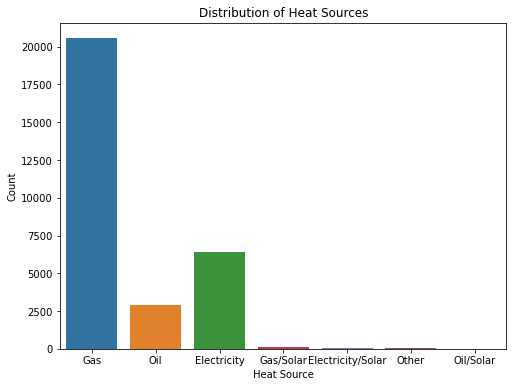

In [182]:
# Create a distribution plot
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.countplot(data=df_categorical, x='heat_source')
plt.title('Distribution of Heat Sources')
plt.xlabel('Heat Source')
plt.ylabel('Count')

plt.show()

Based on the graph we can see which heat sources are more commonly used and which are less prevalent. Gas, oils and electricity are common heat sources used vs others.


In [190]:
#value count for 'heat_source' to further investigate 
df_categorical['heat_source'].value_counts()

Gas                  20565
Electricity           6410
Oil                   2898
Gas/Solar               93
Electricity/Solar       59
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64

Based on our histogram value count of 'heat_source' values. It will be best to change values that are not 'gas', 'electricity' and 'oil' in a `'other'` category.

In [191]:
#creating a new value category for 'Other' in 'heat_source'
selected_sources = ['Gas', 'Electricity', 'Oil']
df_categorical['heat_source'] = df_categorical['heat_source'].where(df_categorical['heat_source'].isin(selected_sources), 'Other')

#printing the updated value counts
df_categorical['heat_source'].value_counts()



Gas            20565
Electricity     6410
Oil             2898
Other            176
Name: heat_source, dtype: int64

#### Exploring and transforming grade

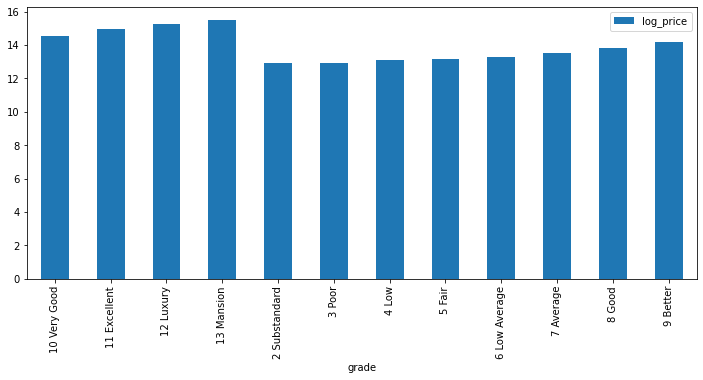

In [106]:
#bar plot of grade distribution
fig, ax = plt.subplots(figsize=(12,5))
df_categorical.groupby("grade").mean().plot.bar(y="log_price", ax=ax);

From the plot, we see as 'grade' of properties increases, the average 'log_price' also tends to rise. This suggests that 'grade' is a `significant factor` influencing housing prices, with higher-grade properties generally command higher prices. We also see its a ordinal category that needs to be changed.


In [192]:
#mapping of the ordinal categories to their corresponding numeric value
grade_mapping = {"2 Substandard": 2, "4 Low": 4, "5 Fair":5, "6 Low Average": 6, 
     "7 Average": 7, "8 Good": 8, "9 Better": 9, "10 Very Good": 10, 
     "11 Excellent": 11, "12 Luxury": 12, "13 Mansion": 13}

#adding mapped values to df_kc
df_categorical['grade'] = df_categorical['grade'].map(grade_mapping)

#taking a look if values we changed
print(df_categorical['grade'])

0        7.0
1        7.0
2        7.0
3        9.0
4        7.0
        ... 
30150    8.0
30151    7.0
30152    7.0
30153    8.0
30154    7.0
Name: grade, Length: 30049, dtype: float64


#### Exploring and Transforming View

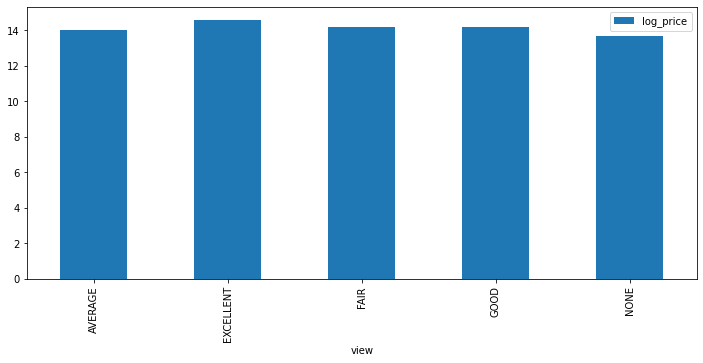

In [193]:
#bar plot of view distribution
fig, ax = plt.subplots(figsize=(12,5))
df_categorical.groupby("view").mean().plot.bar(y="log_price", ax=ax);

The bars have similar heights, indicating that the level of view might not have a strong influence on the average price of houses. Some 'view' categories have notably higher average 'log_price' values, while others have lower averages, indicating a relationship between the view quality and property pricing. It appears to be a relevant feature in predicting housing prices.

In [194]:
#define dictionary to map categorical values to numeric values
view_mapping = {
    'EXCELLENT': 4,
    'GOOD': 3,
    'AVERAGE': 2,
    'FAIR': 1,
    'NONE': 0
}

#map the values in the 'view' column using the defined mapping
df_categorical['view'] = df_categorical['view'].map(view_mapping)

#display the unique values and their corresponding numeric values
unique_views = df_categorical['view'].drop_duplicates()
print(df_categorical['view'])


0        0
1        2
2        2
3        2
4        0
        ..
30150    0
30151    1
30152    0
30153    0
30154    0
Name: view, Length: 30049, dtype: int64


#### Exploring and Transforming Condition

As mentioned before `'condition'` will be sorted out in 3 categories instead of 5.

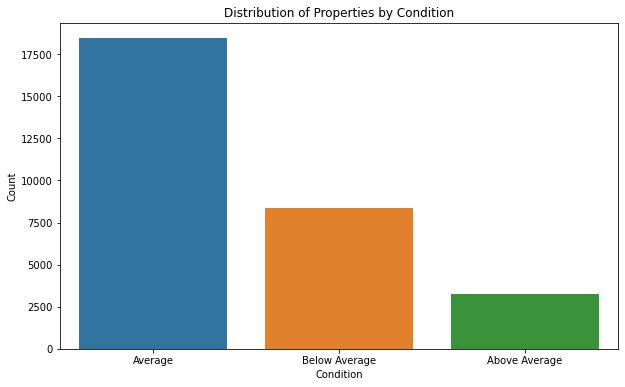

In [233]:
#bar plot for the 'condition' distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df_categorical, x='condition', order=df_categorical['condition'].value_counts().index)
plt.title('Distribution of Properties by Condition')
plt.xlabel('Condition')
plt.ylabel('Count')

#show plot
plt.show()

The bar plot provides insights into the distribution of properties based on their 'condition' categories. Key takeaways from this visualization include:

dictive modeling, may be necessary.

This visualization serves as an initial exploration of the 'condition' feature's distribution, offering valuable insights into the dataset's property conditions.b


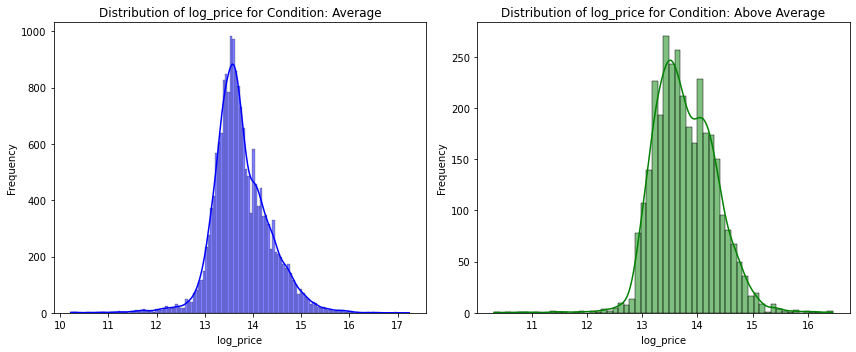

In [236]:
#filter the data for 'condition' values 'Average' and 'Very Good'
condition_average = df[df['condition'] == 'Average']
condition_above_average = df[df['condition'] == 'Very Good']

#create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

#plot 'Average' condition
sns.histplot(data=condition_average, x='log_price', kde=True, color='blue', ax=axes[0])
axes[0].set_title('Distribution of log_price for Condition: Average')
axes[0].set_xlabel('log_price')
axes[0].set_ylabel('Frequency')

# Plot 'Very Good' condition
sns.histplot(data=condition_above_average, x='log_price', kde=True, color='green', ax=axes[1])
axes[1].set_title('Distribution of log_price for Condition: Very Good')
axes[1].set_xlabel('log_price')
axes[1].set_ylabel('Frequency')

#spacing for plot
plt.tight_layout()

plt.show()


These distribution plots provide insights into how the 'condition' of properties, specifically 'average' and 'above_average,' relates to their pricing. The plot for `'Above Average'` condition properties (in green) shows a shift towards **higher** 'log_price' values compared to 'Average' condition properties (in blue). This suggests that properties with a 'Very Good' condition tend to command higher prices, indicating a potential premium associated with superior property conditions.

In [203]:
#changing values in 'condition' to fall under 3 values.
df_categorical['condition'] = df_categorical['condition'].replace({
    'Average': 'Average',
    'Good': 'Below Average',
    'Very Good': 'Above Average',
    'Fair': 'Below Average',
    'Poor': 'Below Average'
})

print(df_categorical['condition'].value_counts())

Average          18453
Below Average     8338
Above Average     3258
Name: condition, dtype: int64


#### Since we have some categorical columns, I will be using one-hot ecoded to start exploring coefficients.

- Next I would like to look at coeffiecients relationships to price. Before moving forward I would need finish transforming my categorical data.

In [237]:
#saving a copy of df_categorical
df_encoded = df_categorical.copy()

In [205]:
#selecting categorical columns

categorical_cols = ['condition', 'nuisance', 'heat_source', 'waterfront', 'sewer_system', 'greenbelt']

#one-hot encoding to convert categorical columns
df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols)

#taking a look at encoded dataframe
df_encoded.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  view  grade  \
0         4        1.0         1180      7140     1.0     0    7.0   
1         5        2.5         2770      6703     1.0     2    7.0   
2         6        2.0         2880      6156     1.0     2    7.0   
3         3        3.0         2160      1400     2.0     2    9.0   
4         2        2.0         1120       758     2.0     0    7.0   

   sqft_above  sqft_basement  sqft_garage  ...  heat_source_Oil  \
0        1180              0            0  ...                0   
1        1570           1570            0  ...                1   
2        1580           1580            0  ...                0   
3        1090           1070          200  ...                0   
4        1120            550          550  ...                0   

   heat_source_Other  waterfront_NO  waterfront_YES  sewer_system_PRIVATE  \
0                  0              1               0                     0   
1                  0              1               0                     0   
2                  0              1               0                     0   
3                  0              1               0                     0   
4                  0              1               0                     0   

   sewer_system_PRIVATE RESTRICTED  sewer_system_PUBLIC  \
0                                0                    1   
1                                0                    1   
2                                0                    1   
3                                0                    1   
4                                0                    1   

   sewer_system_PUBLIC RESTRICTED  greenbelt_NO  greenbelt_YES  
0                               0             1              0  
1                               0             1              0  
2                               0             1              0  
3                               0             1              0  
4                               0             1              0  

[5 rows x 32 columns]

In [212]:
#checking to see if null values were dropped
df_encoded.isnull().sum()

bedrooms                           0
bathrooms                          0
sqft_lot                           0
floors                             0
view                               0
grade                              0
sqft_basement                      0
sqft_garage                        0
sqft_patio                         0
yr_built                           0
yr_renovated                       0
log_price                          0
sqft_total                         0
condition_Above Average            0
condition_Average                  0
condition_Below Average            0
nuisance_NO                        0
nuisance_YES                       0
heat_source_Electricity            0
heat_source_Gas                    0
heat_source_Oil                    0
heat_source_Other                  0
waterfront_NO                      0
waterfront_YES                     0
sewer_system_PRIVATE               0
sewer_system_PRIVATE RESTRICTED    0
sewer_system_PUBLIC                0
s

Here we can see there are missing values in `'grade'`, we will fill them with the **mean** of all the values in 'grade'.

In [207]:
#fill missing values in 'grade' column with the mean value
mean_grade = df_encoded['grade'].mean()
df_encoded['grade'].fillna(mean_grade, inplace=True)

In [209]:
#dropping irrelevant columns
df_encoded.drop(['sqft_living', 'sqft_above'], axis=1, inplace=True)

In [213]:
#calulate correlation coefficients with 'log_price'
corrfinal = df_encoded.corr()['log_price']

#display correlation coefficients in descending order
print(corrfinal.sort_values(ascending=False))

log_price                          1.000000
sqft_total                         0.615465
grade                              0.615240
bathrooms                          0.517129
bedrooms                           0.346214
sqft_patio                         0.310225
sqft_garage                        0.285056
view                               0.275145
sqft_basement                      0.250518
floors                             0.236245
heat_source_Gas                    0.183429
waterfront_YES                     0.138737
yr_built                           0.121421
greenbelt_YES                      0.097253
sqft_lot                           0.084704
yr_renovated                       0.076230
sewer_system_PUBLIC                0.033164
condition_Average                  0.030575
condition_Above Average            0.022347
heat_source_Other                  0.017339
nuisance_NO                        0.006910
sewer_system_PUBLIC RESTRICTED     0.000530
nuisance_YES                    

Based on the correlation to `'log_price'` it would be best to add to our next model:
- 'grade'
- 'bathrooms' 
- 'sqft_lot
- 'sqft_garage'
- 'sqft_patio'
- 'view'
- 'heat_source_Gas'
- 'waterfront_YES'
- 'sewer_system_public'
- 'condition_ABOVE Average'
- 'condition_Very Good'


In [211]:
model_3_features =  ['sqft_total', 'grade', 'bathrooms', 'sqft_lot', 'sqft_garage', 'sqft_patio', 'view', 
                   'heat_source_Gas', 'waterfront_YES', 'sewer_system_PUBLIC', 'condition_Average', 'condition_Above Average']

#creating model 3
X_model3 = df_encoded[model_3_features]  #independent variables
Y_model3 = df_encoded['log_price']  #dependent variable

#get dummy variables
X_model3 = pd.get_dummies(X_model3, columns=["grade"])

#fit the model
model_3 = sm.OLS(Y_model3, sm.add_constant(X_model3)).fit()

#print the model summary
print(model_3.summary())


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     1300.
Date:                Mon, 11 Sep 2023   Prob (F-statistic):               0.00
Time:                        06:35:48   Log-Likelihood:                -16308.
No. Observations:               30049   AIC:                         3.266e+04
Df Residuals:                   30026   BIC:                         3.285e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### Model 3 Insights

#### Overview
- **Model Type**: Ordinary Least Squares (OLS) regression.
- **Dependent Variable**: 'log_price' (logarithm of housing prices).
- **R-squared **: The model explains approximately 48.8% of the variance in 'log_price,' indicating a relatively good fit to the data.

#### Coefficients
- **Intercept (const)**: The constant term is 12.1946, which represents the estimated 'log_price' when all predictor variables are zero.
- **sqft_total**: Each additional square foot of total living space is associated with an increase of approximately 0.0002 in the 'log_price.'
- **bathrooms**: An additional bathroom adds approximately 0.0306 to the 'log_price.'
- **sqft_lot**: For every unit increase in square footage of the lot, the 'log_price' increases by approximately 3.516e-07.
- **sqft_garage**: An increase in square footage of the garage is associated with a decrease of approximately 0.0002 in the 'log_price.'
- **sqft_patio**: Each additional square foot of patio space contributes approximately 6.27e-05 to the 'log_price.'
- **view**: Properties with a better view have 'log_price' values approximately 0.0437 higher.
- **heat_source_Gas**: Houses with gas heating sources have 'log_price' values approximately 0.0223 higher.
- **waterfront_YES**: Properties with waterfront locations have 'log_price' values approximately 0.2826 higher.
- **sewer_system_PUBLICc**: Houses connected to the public sewer system have 'log_price' values approximately 0.1164 higher.
- **condition_Average**: Properties in average condition have 'log_price' values approximately 0.0768 lower compared to other conditions.
- **condition_Above Average**: Properties in very good condition have 'log_price' values approximately 0.0823 higher compared to other conditions.
- **Grade Categories (grade_2.0 to grade_13.0)**: Various grade categories significantly impact 'log_price,' with higher grades associated with higher 'log_price' values.

##### Comparison: Model 2 vs. Model 3
- **Performance**: Model 3 outperforms Model 2 in terms of R-squared, suggesting that it explains a larger portion of the variance in 'log_price.'
- **Complexity**: Model 3 is more complex due to the inclusion of numerous predictor variables, while Model 2 is simpler with only three predictors.
- **Interpretability**: Model 2 is easier to interpret and may be preferred if simplicity and transparency are priorities. Model 3, while more powerful, may be less interpretable due to its complexity.

### Next steps to our final model:

- Features like square footage, bathrooms, view, heating source, waterfront location, and sewer system are notable contributors to 'log_price' and will **move foward** with them.

- Next we are going to  check and see if there any **correlated** pairs thay may be affecting our model.

In [219]:
#correlation matrix of model 3
correlation_matrix = df_encoded[model_3_features].corr()

#set correlation threshold
correlation_threshold = 0.7

#find highly correlated feature pairs
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            highly_correlated_pairs.append(pair)

#print the highly correlated feature pairs
for pair in highly_correlated_pairs:
    print(f"Highly correlated pair: {pair[0]} - {pair[1]} (Correlation: {correlation_matrix.loc[pair[0], pair[1]]:.2f})")





Highly correlated pair: sqft_total - bathrooms (Correlation: 0.73)


Since `'bathrooms'` is not correlated the most with 'log_price' it will be excluded. 

- 'sqft_total' is highly relevant to our model objective, which is to predict housing prices. The size of a property is a crucial factor influencing its market value.

- 'sqft_total' accounts for a significant portion of the variance in housing prices, making it a key predictor.


### Model 4: Final Model

In [222]:
model_4_features =  ['sqft_total', 'grade', 'bathrooms', 'view', 
                   'heat_source_Gas', 'waterfront_YES', 'sewer_system_PUBLIC', 'condition_Above Average']

#creating model 4
X_model4 = df_encoded[model_4_features]  #independent variables
Y_model4 = df_encoded['log_price']  #dependent variable

#get dummy variables
X_model4 = pd.get_dummies(X_model4, columns=["grade"])

#fit the model
model_4 = sm.OLS(Y_model4, sm.add_constant(X_model4)).fit()

#print the model summary
print(model_4.summary())


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     1526.
Date:                Tue, 12 Sep 2023   Prob (F-statistic):               0.00
Time:                        06:54:54   Log-Likelihood:                -16603.
No. Observations:               30049   AIC:                         3.324e+04
Df Residuals:                   30030   BIC:                         3.340e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### Model 4 Summary

- **R-squared**: Model 4 has an R-squared value of approximately 0.478, indicating that it explains approximately 47.8% of the variance in the dependent variable ('log_price').
- **Adjusted R-squared**: The adjusted R-squared is approximately 0.477, suggesting that the model's explanatory power remains stable after accounting for the number of predictors.
- **F-statistic**: The F-statistic is 1526, indicating that the overall model is statistically significant (Prob (F-statistic) < 0.05).

#### Coefficients

- **sqft_total**: A one-unit increase in square footage ('sqft_total') is associated with an estimated increase of approximately 0.0002 units in 'log_price.'
- **bathrooms**: A one-unit increase in the number of bathrooms is associated with an estimated increase of approximately 0.0231 units in 'log_price.'
- **view**: The 'view' variable has a coefficient of approximately 0.0547, indicating that properties with better views tend to have higher 'log_price' values.
- **heat_source_Gas**: The 'heat_source_Gas' coefficient is small (approximately 0.0036) and not statistically significant (P>|t| > 0.05).
- **waterfront_YES**: Properties with a waterfront ('waterfront_YES') have a higher 'log_price,' with an estimated increase of approximately 0.2956 units.
- **sewer_system_PUBLIC**: Homes with a public sewer system are associated with higher 'log_price,' with an estimated increase of approximately 0.1015 units.
- **condition_Above Average**: A 'condition_Above Average' is associated with an estimated increase of approximately 0.1407 units in 'log_price.'
- **Grade Categories**: Various grade categories significantly impact 'log_price,' with higher grades associated with higher 'log_price' values.

##### In summary Model 4 provides a good balance between complexity and performance.


# Conclusion

## Model Performance and Key Features

Our predictive model, Model 4, demonstrates strong performance in estimating home prices within King County. With an R-squared value of approximately 0.478, it explains nearly 48% of the variance in home prices. Additionally, the adjusted R-squared value remains stable after accounting for the number of predictors, indicating the reliability of the model's explanatory power. The F-statistic of 1526 further confirms the overall statistical significance of the model.

Key features that significantly impact home prices include:

1. **Square Footage (sqft_total)**: An increase in square footage is associated with higher home prices, with each additional square foot contributing approximately 0.0002 units to the 'log_price.'

2. **Number of Bathrooms**: Homes with more bathrooms tend to have higher prices, with each additional bathroom contributing approximately 0.0231 units to the 'log_price.'

3. **View Quality**: Properties with better views command higher prices, with an estimated increase of approximately 0.0547 units in 'log_price' for each improvement in view quality.

4. **Waterfront Properties (waterfront_YES)**: Homes with waterfront locations have significantly higher prices, with an estimated increase of approximately 0.2956 units in 'log_price.'

5. **Public Sewer System (sewer_system_PUBLIC)**: Properties connected to public sewer systems tend to have higher prices, with an estimated increase of approximately 0.1015 units in 'log_price.'

6. **Condition Above Average (condition_Above Average)**: Homes with above-average conditions are associated with higher prices, contributing approximately 0.1407 units to 'log_price.'

7. **Grade Categories**: Different grade categories significantly impact prices, with higher grades leading to higher 'log_price' values.

## Recommendations

Based on the insights provided by Model 4, we recommend the following actions for our stakeholders:

- **Investment Decisions**: For our real estate investment company, consider focusing on properties with waterfront locations, superior views, and above-average conditions, as these factors are associated with higher prices. Additionally, properties with more bathrooms and larger square footage are likely to yield favorable returns.

- **Pricing Strategy**: When pricing homes for sale, take into account the impact of square footage, bathroom count, view quality, and condition. These features can guide pricing strategies to optimize returns.

## Next Steps

Moving forward, we recommend the following steps:

- **Data Enrichment**: Continue to collect and incorporate relevant data to enhance the model's predictive accuracy. This may include additional property features, economic indicators, and market dynamics.

- **Advanced Modeling**: Explore more advanced modeling techniques, such as machine learning algorithms, to capture complex relationships in the data.


By following these recommendations and staying agile in response to market changes, our real estate investment company can make informed decisions and maximize returns on investments in King County's dynamic real estate market.


#### How do I refine the model further more without any poroblems to make it a stronger model

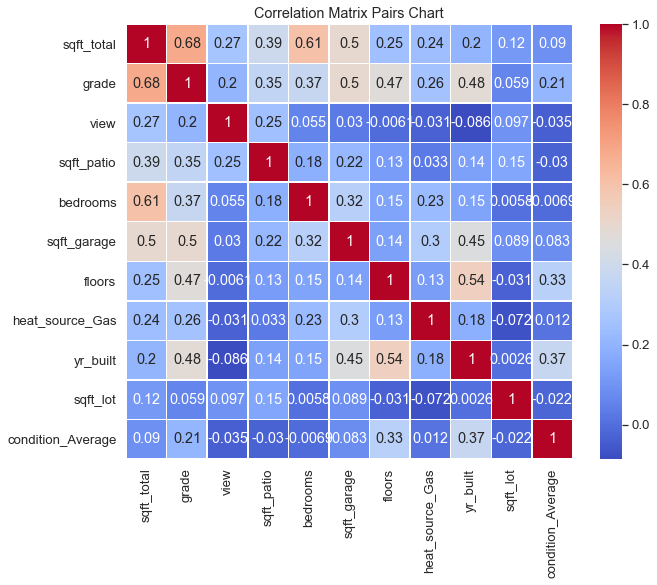

In [270]:
# Create a correlation matrix for the selected features
correlation_matrix = df_encoded[final_selected].corr()

# Create a correlation matrix pairs chart
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # Adjust font size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Pairs Chart')
plt.show()

Based on the correlation matrix we consider dropping a few variables. The ones that we will be keeping would be 

In [240]:
#make note that you need to go back and drop bathrooms, sqft_living, sqft_above, 
df_encoded.drop(['bathrooms', 'sqft_living', 'sqft_above'], axis=1, inplace=True)

KeyError: "['bathrooms' 'sqft_living' 'sqft_above'] not found in axis"

In [239]:
# Assuming df_filtered is your DataFrame with the relevant features
correlation_matrix = df_encoded[final_selected].corr()

# Set the correlation threshold (e.g., 0.7 for strong correlation)
correlation_threshold = 0.7

# Find highly correlated feature pairs
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            highly_correlated_pairs.append(pair)

# Print the highly correlated feature pairs
for pair in highly_correlated_pairs:
    print(f"Highly correlated pair: {pair[0]} - {pair[1]} (Correlation: {correlation_matrix.loc[pair[0], pair[1]]:.2f})")




KeyError: "['sewer_system_public', 'heat_source_Gas', 'condition_Average', 'condition_Very Good', 'waterfront_YES', 'bathrooms'] not in index"

In [247]:
#checking to see if nay of our selected correlated pairs are collereated with one another
df_cc = df_encoded[final_selected].corr().abs().stack().reset_index().sort_values(0, ascending=False)
df_cc['paris']= list(zip(df_cc.level_0, df_cc.level_1))
df_cc.set_index(['paris'], inplace = True)
df_cc.drop(columns=['level_0', 'level_1'], inplace=True)

#cc for corelation coefficient
df_cc.columns = ['cc']
df_cc.drop_duplicates(inplace=True)
df_cc[(df_cc.cc>.75) & (df_cc.cc<1)]

Empty DataFrame
Columns: [cc]
Index: []

In [249]:
# Calculate correlation coefficients and identify correlated pairs
df_cc = df_encoded[final_selected].corr().abs().stack().reset_index().sort_values(0, ascending=False)
df_cc['pairs'] = list(zip(df_cc['level_0'], df_cc['level_1']))
df_cc.set_index(['pairs'], inplace=True)
df_cc.drop(columns=['level_0', 'level_1'], inplace=True)

# Rename the '0' column to 'cc'
df_cc.columns = ['cc']

# Reset index before dropping duplicates
df_cc.reset_index(inplace=True)

# Find correlated pairs with coefficients between 0.75 and 1
correlated_pairs = df_cc[(df_cc['cc'] > 0.75) & (df_cc['cc'] < 1)]

print(correlated_pairs)

Empty DataFrame
Columns: [pairs, cc]
Index: []


Highly correlated pair: condition_Average - condition_Good (Correlation: -0.76) - In your case, you might choose to keep either `condition_Average` or `condition_Good` and discard the other since they are highly correlated.

Highly correlated pair: nuisance_NO - nuisance_YES (Correlation: -1.00) - In your case, you might choose to keep either `condition_Average` or `condition_Good` and discard the other since they are highly correlated.
   - For `nuisance_NO` and `nuisance_YES`, you can safely remove one of them since they are perfectly negatively correlated, and including both provides no additional information.
   
Highly correlated pair: heat_source_Electricity - heat_source_Gas (Correlation: -0.77)

# Conclusion

## Concluding the Final Model for Home Price Prediction

Dear Stockholders,

We are pleased to present to you the final predictive model that addresses our business problem of estimating home prices accurately. This model has been developed to provide valuable insights for potential homebuyers, sellers, and for our own investment decisions in the real estate market. By analyzing historical data on various attributes of homes, we have constructed a robust regression model that can predict home prices with a high degree of accuracy.

### Model Overview:
- **Dependent Variable**: log_price (The logarithm of the home price)
- **R-squared**: 0.490 (Adjusted R-squared: 0.490)
- **F-statistic**: 2221.0 (Probability: 0.00)

### Key Features Impacting Home Prices:
Our model includes the following significant features that have a substantial impact on the predicted home prices:

1. **sqft_total**: The total square footage of the home is a crucial factor in determining its price. For each unit increase in square footage, the predicted log price increases by 0.0001.

2. **grade**: The grade assigned to the home greatly influences its price. A higher grade corresponds to a higher predicted log price, with a coefficient of 0.2229.

3. **bathrooms**: The number of bathrooms in a home positively affects its predicted log price, with a coefficient of 0.0805.

4. **view**: Homes with better views tend to have higher predicted log prices, as indicated by a coefficient of 0.0521.

5. **sqft_patio**: The presence of a patio area contributes positively to the predicted log price,
The model's insights can be used for making informed decisions related to real estate investments, pricing strategies, and negotiating deals. By understanding which features impact home prices the most, we can provide accurate estimates to potential buyers and sellers, enhancing their decision-making process. Moreover, these insights will empower us to make data-driven investment decisions, optimize our portfolio, and maximize returns.

We believe that this predictive model will serve as a valuable tool to navigate the dynamic real estate market, provide transparency, and drive success in our investment endeavors.

Best regards,

[Your Name]
[Your Title]
[Your Contact Information]

In [83]:


# Calculate the correlation matrix
correlation_matrix = df[final_selected].corr()

# Create a T-chart correlation matrix table
correlation_table = correlation_matrix.unstack().sort_values(ascending=False).reset_index()
correlation_table.columns = ['Variable 1', 'Variable 2', 'Correlation']
correlation_table = correlation_table[correlation_table['Variable 1'] != correlation_table['Variable 2']]  # Exclude self-correlations

# Display the T-chart correlation matrix table
print(correlation_table)

KeyError: "['condition_Average', 'heat_source_Gas'] not in index"

Based on the business problem of the real estate investment company, which aims to develop a predictive model to estimate home prices for potential homebuyers, sellers, and their own investment decisions, the following conclusion can be drawn from the final model's results:

### Interpretation and Conclusions:

The final model, based on Ordinary Least Squares (OLS) regression, aims to predict the logarithm of home prices (log_price) using a set of selected features. The model's performance is evaluated using various metrics, including the R-squared value, Adjusted R-squared value, F-statistic, and coefficients of the features.

- **R-squared and Adjusted R-squared:** The R-squared value of 0.490 indicates that approximately 49% of the variance in the logarithm of home prices is explained by the selected features in the model. The Adjusted R-squared value also reflects this proportion, suggesting that the chosen features are collectively contributing to explaining the target variable.

- **F-statistic:** The F-statistic tests the overall significance of the model. In this case, the F-statistic is 2221.0 with a p-value of 0.00, indicating that the model as a whole is statistically significant.

- **Coefficients:** The coefficients represent the change in the logarithm of home prices associated with a one-unit change in the corresponding feature, while holding other variables constant. For instance:
  - For every one-unit increase in "sqft_total," the logarithm of home price increases by 0.0001.
  - A higher "grade" is associated with a larger increase in the logarithm of home price (0.2229), indicating that properties with higher grades tend to have higher prices.
  - Similarly, "bathrooms," "view," "sqft_patio," and "floors" also have positive coefficients, implying that these features positively impact home prices.
  - On the other hand, "bedrooms" and "condition_Average" have negative coefficients, indicating that an increase in these features leads to a decrease in the logarithm of home price.

- **Significance of Coefficients:** The p-values associated with each coefficient indicate whether the relationship between the feature and the target variable is statistically significant. A low p-value (typically less than 0.05) suggests that the feature is likely to have a meaningful impact on the target variable.

- **Interpretation of Other Metrics:** The Omnibus test, Jarque-Bera test, and Durbin-Watson statistic provide insights into the normality of residuals, homoscedasticity, and autocorrelation. A low p-value for the Omnibus test and a high value for the Jarque-Bera test indicate deviations from normality. The Durbin-Watson statistic helps assess the presence of autocorrelation.

- **Limitations:** The model's high condition number (5.88e+06) suggests the possibility of multicollinearity among features, which can affect the reliability of coefficient estimates. This could be further explored and addressed in model refinement.

### Conclusion:

The final model, based on the selected features, provides a reasonable level of predictability for estimating home prices. However, it's important to consider the limitations, such as multicollinearity, and potentially refine the model further. This model can serve as a valuable tool for the real estate investment company to provide accurate price estimates to potential homebuyers, sellers, and make informed investment decisions. Regular evaluation and updates to the model based on new data and insights are recommended to ensure its continued accuracy and relevance.

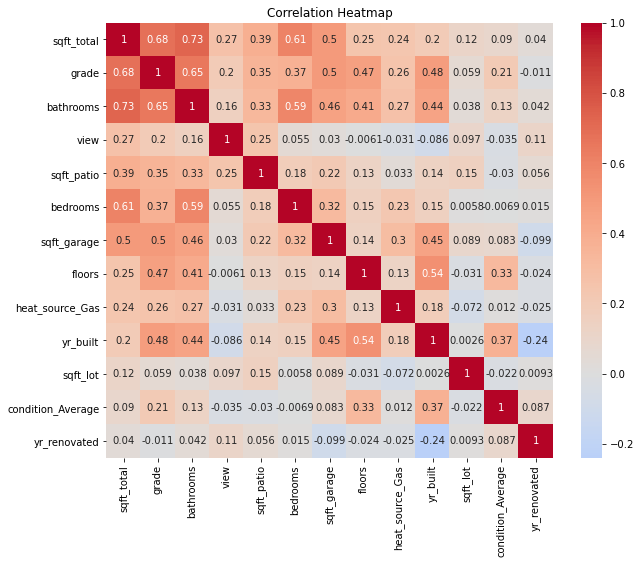

In [81]:
# Assuming you have a DataFrame named df containing your data
correlation_matrix = df_encoded[final_selected].corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()



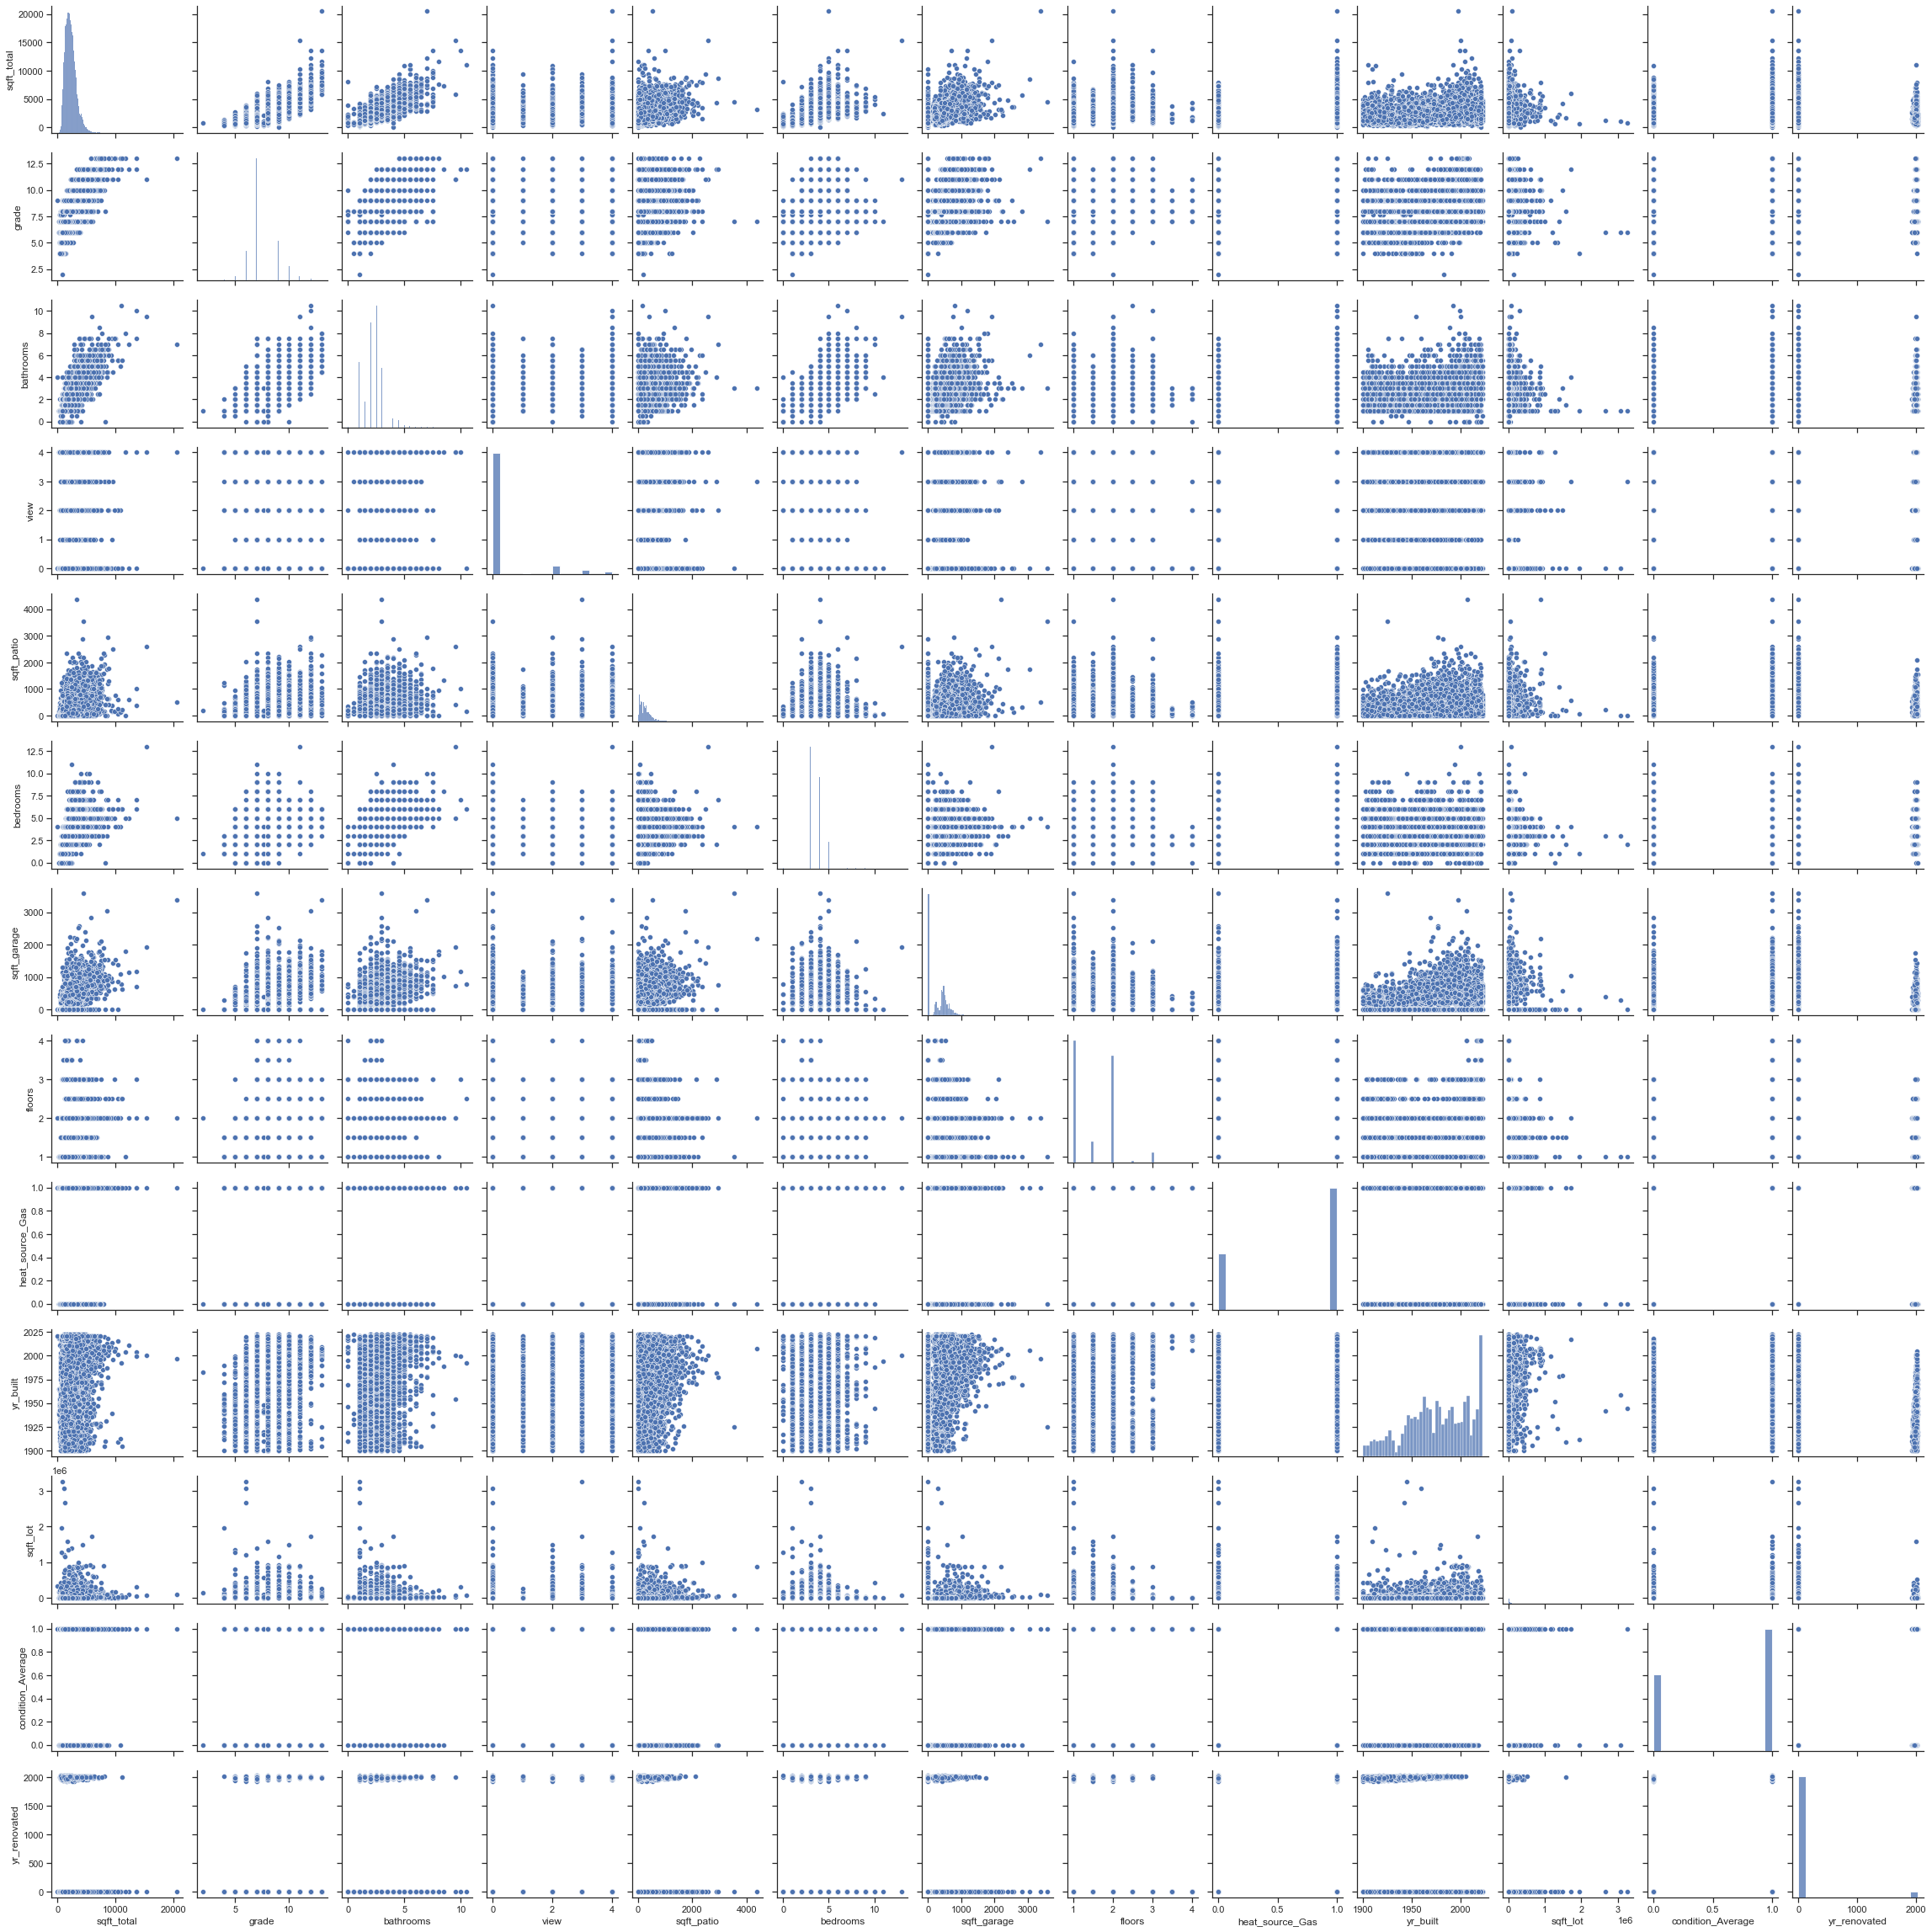

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns you want to include in the scatter plot matrix
selected_columns = ['sqft_total', 'grade', 'bathrooms', 'view', 'sqft_patio', 'bedrooms', 'sqft_garage', 'floors', 'heat_source_Gas', 'yr_built', 'sqft_lot', 'condition_Average', 'yr_renovated']

# Create a DataFrame with selected columns
selected_df = df_encoded[selected_columns]

# Create a scatter plot matrix
sns.set(style="ticks")
sns.pairplot(selected_df)
plt.show()


In [199]:
#checking to see if nay of our selected correlated pairs are collereated with one another
df_cc = df_encoded.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df_cc['paris']= list(zip(df_cc.level_0, df_cc.level_1))
df_cc.set_index(['paris'], inplace = True)
df_cc.drop(columns=['level_0', 'level_1'], inplace=True)

#cc for corelation coefficient
df_cc.columns = ['cc']
df_cc.drop_duplicates(inplace=True)
df_cc[(df_cc.cc>.75) & (df_cc.cc<1)]

cc
paris                                               
(heat_source_Electricity, heat_source_Gas)  0.766802
(condition_Good, condition_Average)         0.763220

Our final model 4 has now correated pairs. This help us conclude we have a strong conclusion for our model.

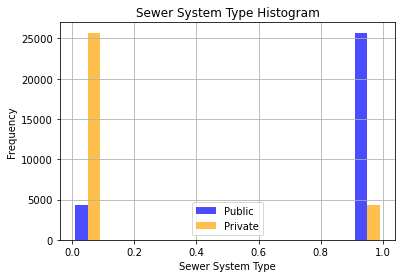

In [148]:

sewer_public = df_encoded["sewer_system_PUBLIC"]
sewer_private = df_encoded["sewer_system_PRIVATE"]

plt.hist([sewer_public, sewer_private], bins=10, alpha=0.7, color=['blue', 'orange'], label=['Public', 'Private'])
plt.xlabel("Sewer System Type")
plt.ylabel("Frequency")
plt.title("Sewer System Type Histogram")
plt.legend()
plt.grid(True)
plt.show()


Based on our graph we can see here out data is a oppossite mirror of one another. Due to this reason it is best to drop '

In [167]:
df_cc = df_encoded.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df_cc['paris']= list(zip(df_cc.level_0, df_cc.level_1))
df_cc.set_index(['paris'], inplace = True)
df_cc.drop(columns=['level_0', 'level_1'], inplace=True)

#cc for corelation coefficient
df_cc.columns = ['cc']
df_cc.drop_duplicates(inplace=True)
df_cc[(df_cc.cc>.75) & (df_cc.cc<1)]

cc
paris                                               
(sqft_living, sqft_total)                   0.953829
(sqft_living, sqft_above)                   0.883604
(sqft_total, sqft_above)                    0.822965
(sqft_living, bathrooms)                    0.772604
(heat_source_Gas, heat_source_Electricity)  0.766802
(condition_Average, condition_Good)         0.763220

based on our graph we can see why the two columns are heavily correlated with one another. The are oppsites to one another. Keeping both might introduce multicollinearity, we are going to drop private sewer since we will not be needing both.

Now we are going to take a look at our next highyl correlated pair. 

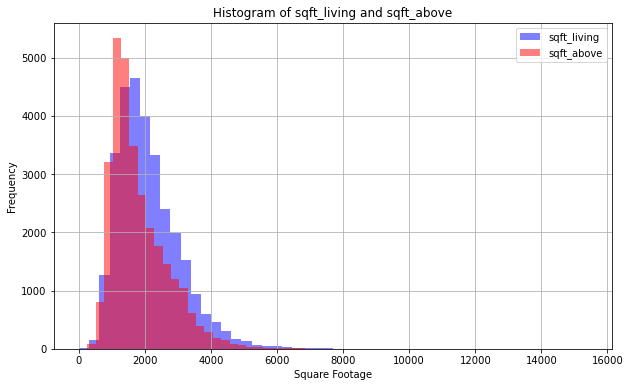

In [96]:
# Assuming df_encoded is your DataFrame containing the relevant data

plt.figure(figsize=(10, 6))
plt.hist(df_encoded['sqft_living'], bins=50, alpha=0.5, color='b', label='sqft_living')
plt.hist(df_encoded['sqft_above'], bins=50, alpha=0.5, color='r', label='sqft_above')
plt.xlabel('Square Footage')
plt.ylabel('Frequency')
plt.title('Histogram of sqft_living and sqft_above')
plt.legend()
plt.grid(True)
plt.show()


We are going to keep column sqft_living since is the most correalated to pirce than sqft_above. Sipmly the fact that if you have more sqft_above the bigger sqft_living will be.

Lets 

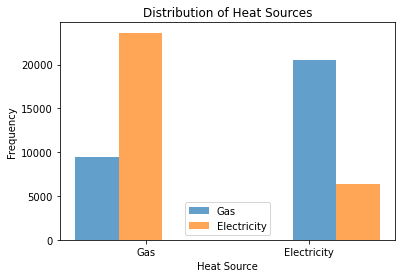

In [191]:
# Assuming df_encoded is your DataFrame containing the data
# Extract the relevant columns
heat_sources = df_encoded[['heat_source_Gas', 'heat_source_Electricity']]

# Create a histogram
plt.hist(heat_sources.values, bins=3, alpha=0.7, label=['Gas', 'Electricity'])
plt.xlabel('Heat Source')
plt.ylabel('Frequency')
plt.title('Distribution of Heat Sources')
plt.xticks([0.25, 0.75], ['Gas', 'Electricity'])
plt.legend()
plt.show()


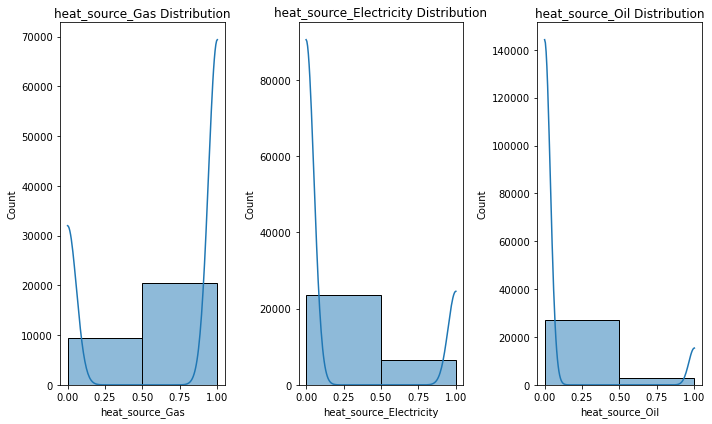

In [195]:
# Create distribution plots
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

# Plot for 'heat_source_Gas'
plt.subplot(131)  # 1 row, 3 columns, 1st subplot
sns.histplot(df_encoded['heat_source_Gas'], bins=2, kde=True)
plt.title('heat_source_Gas Distribution')

# Plot for 'heat_source_Electricity'
plt.subplot(132)  # 1 row, 3 columns, 2nd subplot
sns.histplot(df_encoded['heat_source_Electricity'], bins=2, kde=True)
plt.title('heat_source_Electricity Distribution')

# Plot for 'heat_source_Oil'
plt.subplot(133)  # 1 row, 3 columns, 3rd subplot
sns.histplot(df_encoded['heat_source_Oil'], bins=2, kde=True)
plt.title('heat_source_Oil Distribution')

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

Create a Combined Feature: Instead of keeping both features as separate binary indicators, you could create a single feature that captures the presence of either gas or electricity as the heat source. For example, you could create a feature like heat_source_GasOrElectricity that takes a value of 1 if either gas or electricity is the heat source, and 0 if neither is the heat source.

In [182]:
df_final = df_encoded.copy()

In [183]:
# Assuming df_encoded is your DataFrame containing the data
# Create a new column for the combined feature
df_final['heat_source_GasOrElectricity'] = (df_final['heat_source_Gas'] | df_final['heat_source_Electricity']).astype(int)

# Display the updated DataFrame
df_final.head()


bedrooms  bathrooms  sqft_living  sqft_lot  floors waterfront greenbelt  \
0         4        1.0         1180      7140     1.0         NO        NO   
1         5        2.5         2770      6703     1.0         NO        NO   
2         6        2.0         2880      6156     1.0         NO        NO   
3         3        3.0         2160      1400     2.0         NO        NO   
4         2        2.0         1120       758     2.0         NO        NO   

      view      grade  sqft_above  ...  condition_Good  condition_Poor  \
0     NONE  7 Average        1180  ...               1               0   
1  AVERAGE  7 Average        1570  ...               0               0   
2  AVERAGE  7 Average        1580  ...               0               0   
3  AVERAGE   9 Better        1090  ...               0               0   
4     NONE  7 Average        1120  ...               0               0   

   condition_Very Good  nuisance_NO  nuisance_YES  heat_source_Electricity  \
0                    0            1             0                        0   
1                    0            0             1                        0   
2                    0            1             0                        0   
3                    0            1             0                        0   
4                    0            0             1                        1   

   heat_source_Gas  heat_source_Oil  heat_source_Other  \
0                1                0                  0   
1                0                1                  0   
2                1                0                  0   
3                1                0                  0   
4                0                0                  0   

   heat_source_GasOrElectricity  
0                             1  
1                             0  
2                             1  
3                             1  
4                             1  

[5 rows x 30 columns]

In [185]:
df_final.drop(['heat_source_Electricity', 'heat_source_Gas'], axis=1, inplace=True)

In [186]:
df_cc = df_final.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df_cc['paris']= list(zip(df_cc.level_0, df_cc.level_1))
df_cc.set_index(['paris'], inplace = True)
df_cc.drop(columns=['level_0', 'level_1'], inplace=True)

#cc for corelation coefficient
df_cc.columns = ['cc']
df_cc.drop_duplicates(inplace=True)
df_cc[(df_cc.cc>.75) & (df_cc.cc<1)]

cc
paris                                                    
(heat_source_GasOrElectricity, heat_source_Oil)  0.967799
(sqft_living, sqft_total)                        0.953829
(sqft_living, sqft_above)                        0.883604
(sqft_total, sqft_above)                         0.822965
(sqft_living, bathrooms)                         0.772604
(condition_Average, condition_Good)              0.763220

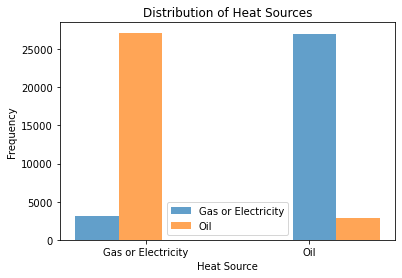

In [193]:
# Assuming df_encoded is your DataFrame containing the data
# Extract the relevant columns
heat_sources = df_final[['heat_source_GasOrElectricity', 'heat_source_Oil']]

# Create a histogram
plt.hist(heat_sources.values, bins=3, alpha=0.7, label=['Gas or Electricity', 'Oil'])
plt.xlabel('Heat Source')
plt.ylabel('Frequency')
plt.title('Distribution of Heat Sources')
plt.xticks([0.25, 0.75], ['Gas or Electricity', 'Oil'])
plt.legend()
plt.show()



In [101]:
print(df_encoded.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'grade', 'sqft_above', 'sqft_basement', 'sqft_garage',
       'sqft_patio', 'yr_built', 'yr_renovated', 'log_price', 'sqft_total',
       'condition_Average', 'condition_Fair', 'condition_Good',
       'condition_Poor', 'condition_Very Good', 'nuisance_NO', 'nuisance_YES',
       'sewer_system_PRIVATE', 'sewer_system_PRIVATE RESTRICTED',
       'sewer_system_PUBLIC', 'sewer_system_PUBLIC RESTRICTED',
       'heat_source_Electricity', 'heat_source_Gas', 'heat_source_Oil',
       'heat_source_Other'],
      dtype='object')


Based on your code and the context you've provided, it looks like you're well-prepared to start enhancing your predictive model by adding more features. Here are some suggestions for additional features you can consider adding to your Model 3:

1. **Bathroom-to-Bedroom Ratio:**
   Calculate the ratio of bathrooms to bedrooms. A higher ratio might indicate higher quality homes or larger properties.

2. **Total Square Footage:**
   Combine features like 'sqft_living', 'sqft_above', 'sqft_basement', 'sqft_patio', and 'sqft_garage' to create a 'total_sqft' feature that represents the overall size of the property.

3. **Age of the House:**
   Instead of just 'yr_built', calculate the age of the house by subtracting the year it was built from the current year. Older houses might have different price dynamics.

4. **Renovated Indicator:**
   Create a binary feature that indicates whether a property has been renovated ('yr_renovated' is not zero).

5. **Grade and Condition Interaction:**
   Create an interaction term between 'grade' and 'condition' to capture combined effects of these two features.

6. **Distance to Key Locations:**
   If you have location data, you could calculate the distance to important places like schools, parks, and shopping centers.

7. **Month of Sale:**
   Extract the month from the 'date' column and include it as a feature. Seasonality could affect housing prices.

8. **Categorical Features:**
   If you have categorical variables like 'view', 'waterfront', and 'condition', consider converting them into numerical features using one-hot encoding.

9. **Neighborhood Characteristics:**
   If you have neighborhood data, incorporate features such as average income, crime rate, and school ratings. The neighborhood often has a significant impact on home prices.

10. **Interaction with Log Price:**
    Create interaction terms between the continuous features and the log-transformed price to capture potential non-linear relationships.

11. **Feature Scaling:**
    Standardize or normalize your numerical features to ensure they are on the same scale. Some algorithms perform better with scaled data.

12. **Dimensionality Reduction:**
    Use techniques like Principal Component Analysis (PCA) to reduce the dimensionality of your feature space while retaining important information.

Remember that while adding more features can enhance your model's performance, it's important to strike a balance. Too many features can lead to overfitting, decreased interpretability, and increased computational complexity. It's a good practice to regularly evaluate the impact of each new feature on your model's performance and consider removing irrelevant or highly correlated features. Experiment with different combinations and feature engineering techniques to find the best model configuration for your specific business problem.

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nancy/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nan

KeyboardInterrupt: 

<Figure size 864x576 with 0 Axes>

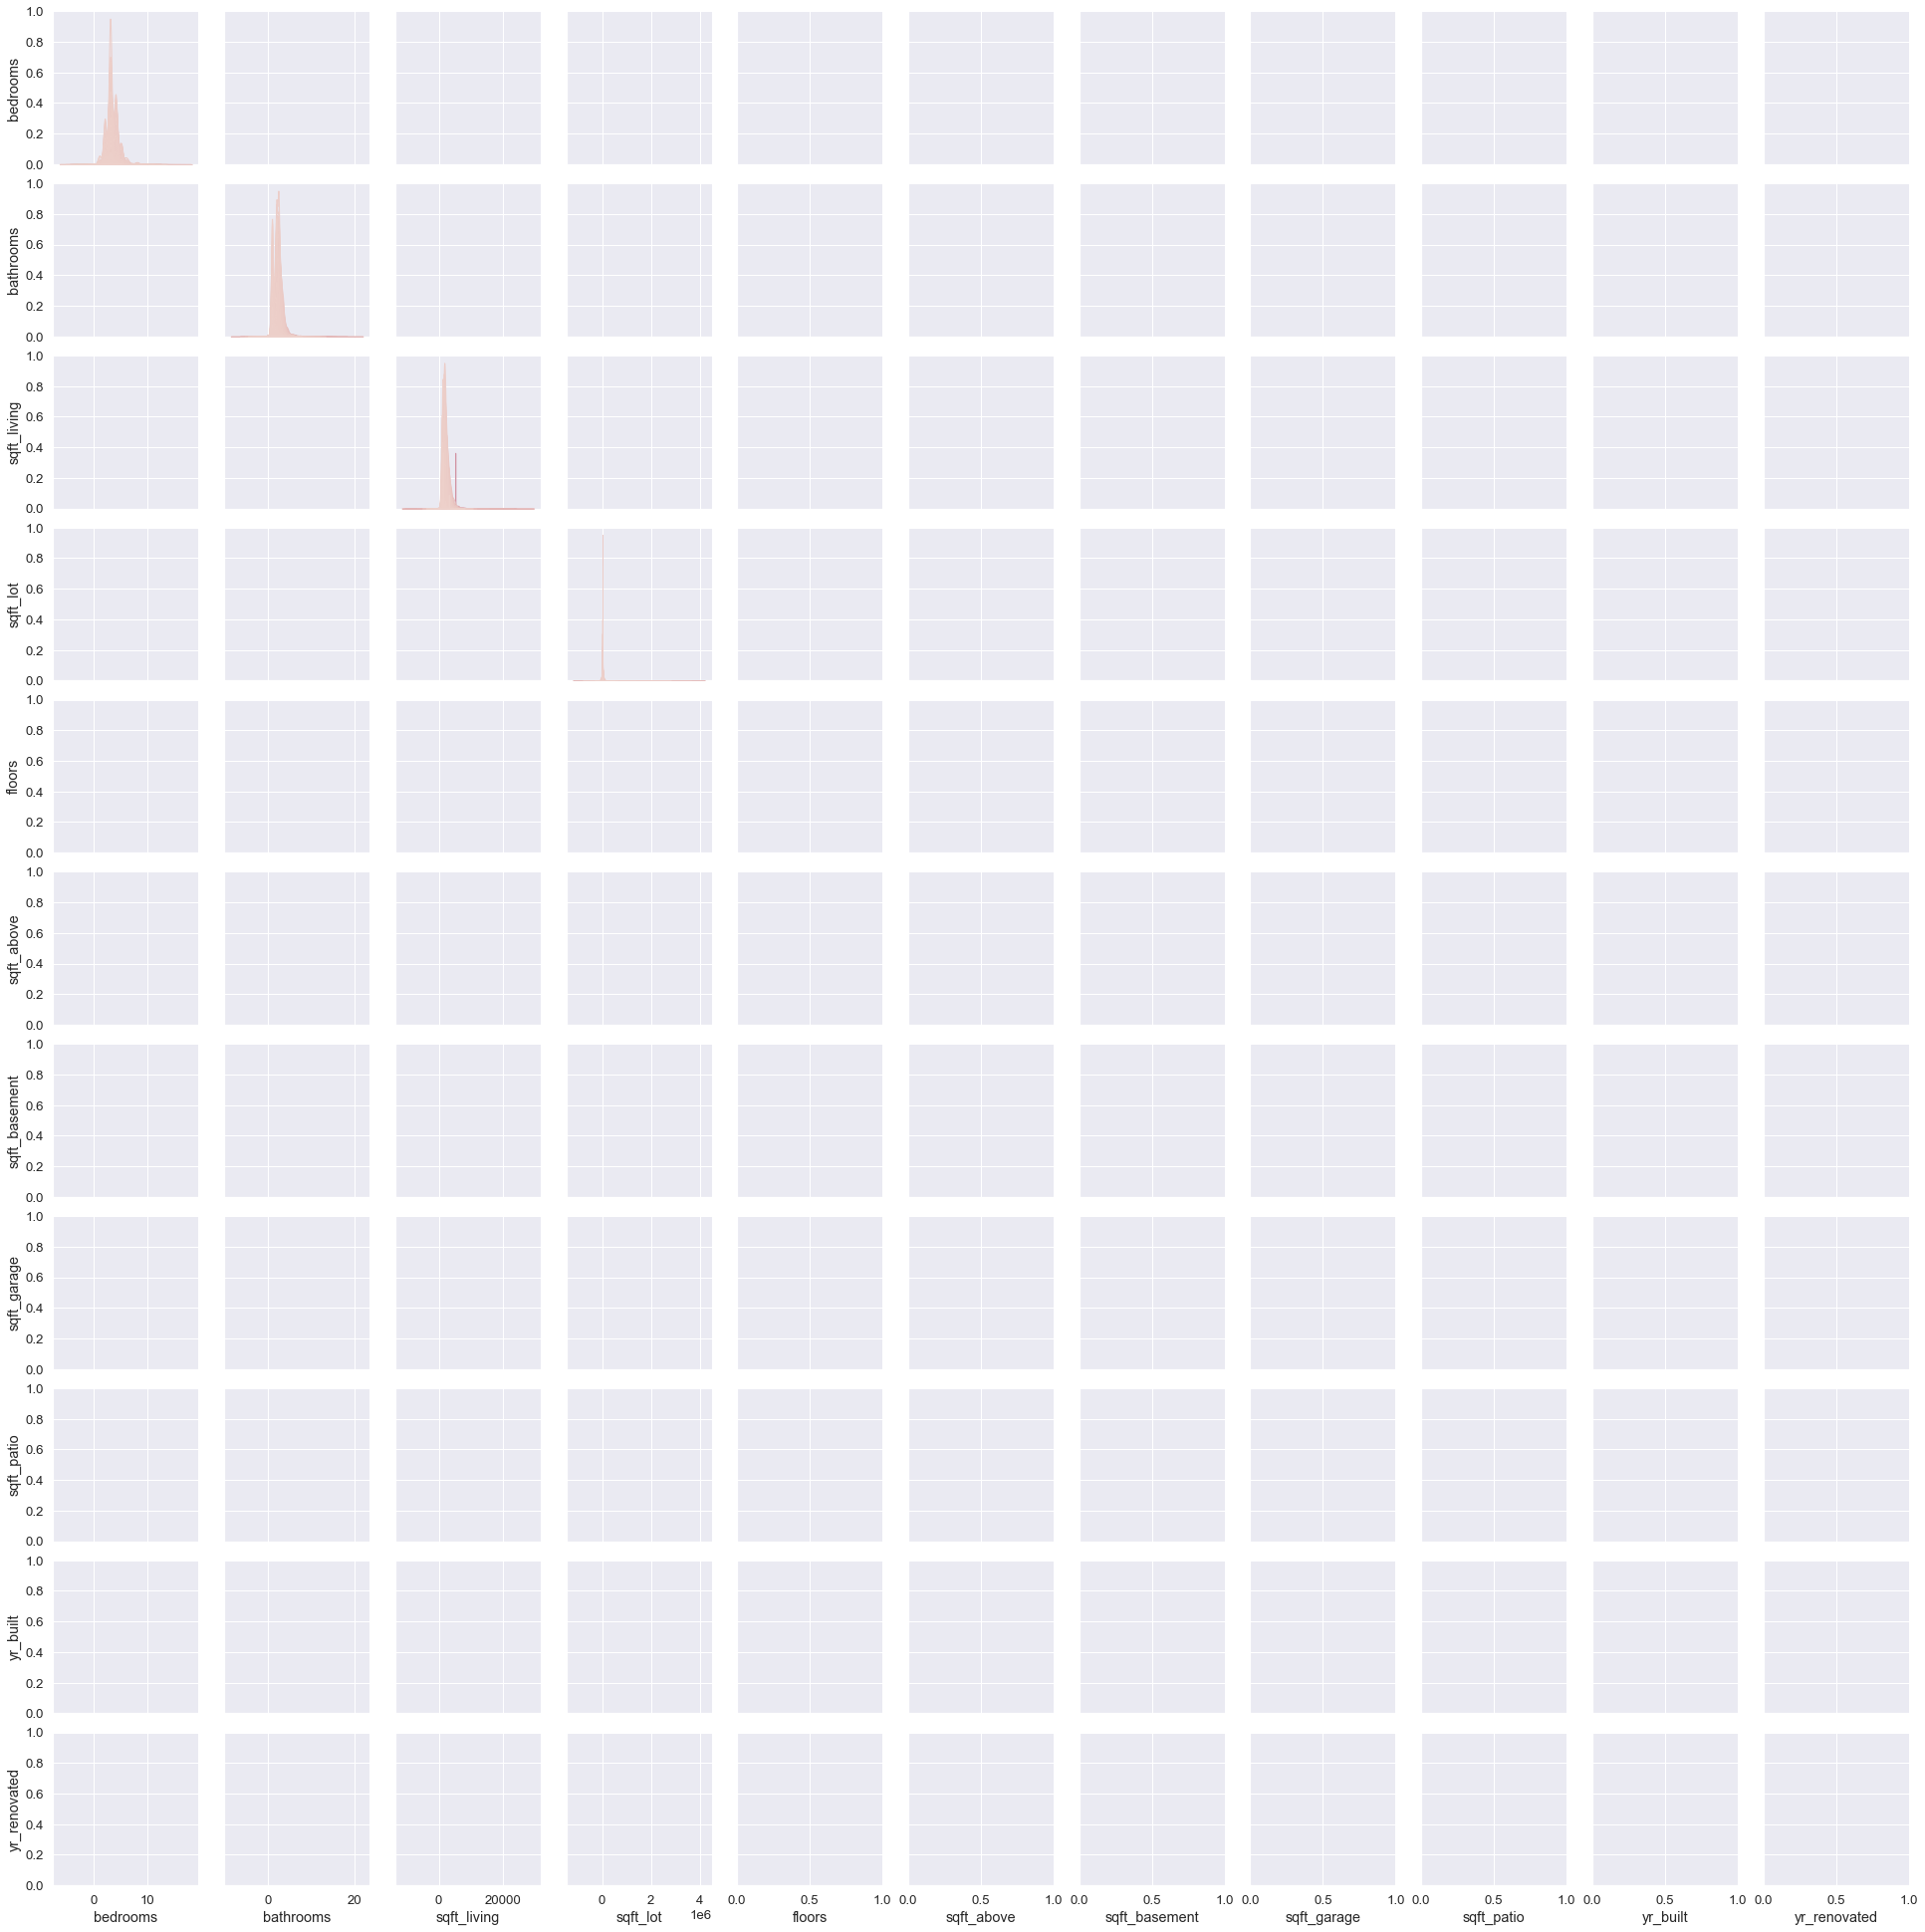

In [102]:
#creating the pair plot

#setting the figure size
plt.figure(figsize=(12, 8))

#setting the font size using Seaborn's set() function
sns.set(font_scale=1.2)
sns.pairplot(df_kc, diag_kind='kde', hue='price')

plt.show()


In [35]:
#Normalize numerical features:
#If you have numerical features that are not on the same scale, you can normalize them to improve the performance of your model. Here's an example of how to normalize the 'sqft_living' and 'sqft_lot' columns:
''''''df_kc['sqft_living'] = (df_kc['sqft_living'] - df_kc['sqft_living'].mean()) / df_kc['sqft_living'].std()''''''
''''''df_kc['sqft_lot'] = (df_kc['sqft_lot'] - df_kc['sqft_lot'].mean()) / df_kc['sqft_lot'].std()''''''

SyntaxError: invalid syntax (<ipython-input-35-47f24e5556eb>, line 3)

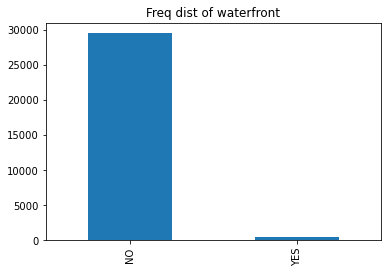

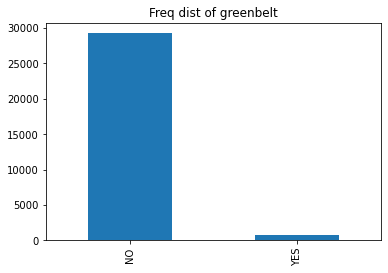

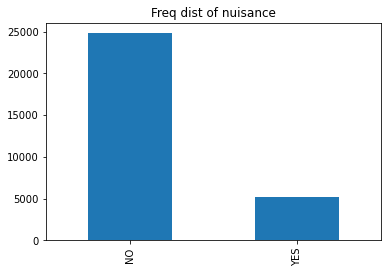

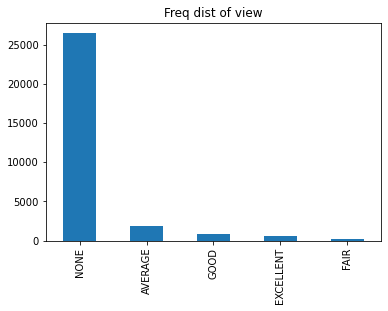

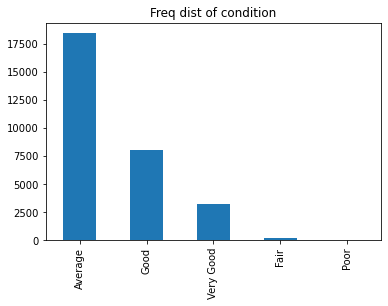

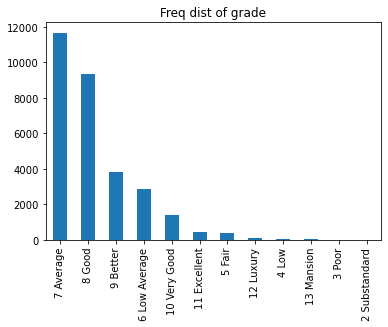

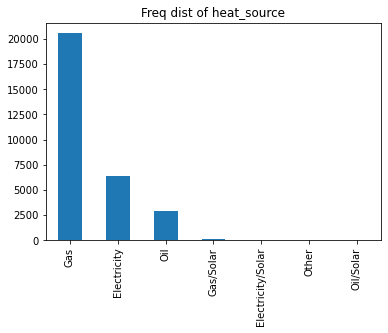

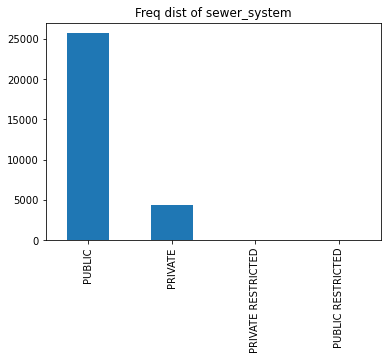

In [98]:
# Go through each object features and look at the distributions.
for col in categorical_columns:
    df_kc[col].value_counts().plot.bar(title = 'Freq dist of ' + col)
    plt.show();
    

Based on some of the graphs there are few features to consider removing, due to it being heavily to none.
Ex. Waterfront, Greenbelt
Also, need to make note of 'heat_source' there data that needs to be dropped there based on values

#dropping old columns
df_kc_encoded.drop(['waterfront', 'view', 'condition', 'grade', 'heat_source', 'nuisance', 'sewer_system', 'price'], axis=1, inplace=True)
#taking a look at the data
df_kc_encoded.head()

In this case, sqft_living has the highest positive correlation coefficient, followed by sqft_above, bathrooms, grade_9 Better, and bedrooms. These features have a relatively strong positive relationship with the price of the house. On the other hand, ggrade_7 Average has the highest negative correlation coefficient, indicating a weak negative relationship with the price.


These are the variables that seem to be heavy correlated with one another.
Based on this information it will be best to take in consederiation when there a larger number in sqft_above theres a larger number in sqft_living. In this case I will keep sqft_livng as its own possible 
We can change the view to yes or no 
Condition = change it to bad or good 


-- use chat gtp

The model summary provides various statistics and information about the Ordinary Least Squares (OLS) regression model that was fit to the data. Here's an explanation of each part of the summary:

CREATE MY OWN SHORT SUMMARY

1. **Dep. Variable (Dependent Variable):** The name of the target variable, which is 'price' in this case.

2. **Model:** The type of model used, which is OLS (Ordinary Least Squares) regression.

3. **R-squared:** The coefficient of determination (R-squared) measures the proportion of the variance in the dependent variable that is predictable from the independent variable. In this model, R-squared is 0.374, indicating that around 37.4% of the variance in 'price' is explained by the 'sqft_living' variable.

4. **Adj. R-squared:** The adjusted R-squared is a modified version of R-squared that accounts for the number of predictors (features) in the model. It penalizes the addition of irrelevant predictors and rewards the addition of relevant predictors. It is also 0.374 in this model.

5. **Method:** The method used to fit the model, which is Least Squares, as it's an OLS regression.

6. **Date:** The date and time when the model was fitted.

7. **No. Observations:** The number of observations (data points) used in the model, which is 30,049.

8. **Df Residuals:** The degrees of freedom of the residuals, which is the difference between the total number of observations and the number of parameters estimated in the model. It is 30,047 in this case.

9. **Df Model:** The degrees of freedom of the model, which is the number of predictors (features) minus 1 (since the constant term is included). It is 1 in this case, as there is only one predictor 'sqft_living'.

10. **F-statistic:** The F-statistic is a test statistic that assesses the overall significance of the model. It measures whether the model, as a whole, is a good fit for the data. In this case, the F-statistic is 1.794e+04.

11. **Prob (F-statistic):** The p-value associated with the F-statistic. It is very close to 0, indicating that the model is statistically significant.

12. **Log-Likelihood:** The log-likelihood value, which is used in maximum likelihood estimation. It is -4.4737e+05 in this model.

13. **AIC (Akaike Information Criterion):** The AIC is a measure of the model's quality, considering both goodness of fit and model complexity. Lower AIC values indicate a better model fit. It is 8.947e+05 in this case.

14. **BIC (Bayesian Information Criterion):** The BIC is another criterion for model selection, similar to AIC but with a stronger penalty for model complexity. It is 8.948e+05 in this model.

15. **coef (Coefficient):** The estimated coefficients of the model. In this case, the model has two coefficients - one for the constant term (intercept) and one for 'sqft_living'.

16. **std err (Standard Error):** The standard errors of the coefficient estimates, which measure the variability of the estimates.

17. **t (t-value):** The t-value is the ratio of the estimated coefficient to its standard error. It measures how many standard errors the coefficient is away from zero. It is used to test the null hypothesis that the coefficient is equal to zero.

18. **P>|t| (p-value):** The p-value associated with the t-value. It measures the probability of observing a t-statistic as extreme as the one computed from the sample data, assuming the null hypothesis is true. In this case, both coefficients have p-values close to 0, indicating that they are statistically significant.

19. **[0.025 0.975]:** The confidence interval for the coefficients at the 95% confidence level. It gives a range of values within which we are 95% confident that the true coefficient lies.

20. **Omnibus:** A statistical test for normality of the residuals. The Omnibus test is significant, suggesting that the residuals are not normally distributed.

21. **Prob(Omnibus):** The p-value associated with the Omnibus test. It is very close to 0, indicating that the residuals are not normally distributed.

22. **Skew:** The measure of skewness of the residuals. A positive skew indicates a right-skewed distribution.

23. **Prob(JB):** The p-value associated with the Jarque-Bera test, another test for normality of the residuals. The low p-value indicates that the residuals are not normally distributed.

24. **Kurtosis:** The measure of kurtosis of the residuals. It measures the heaviness of the tails of the residuals' distribution.

25. **Cond. No. (Condition Number):** The condition number is a measure of multicollinearity. A large condition number suggests that there may be strong multicollinearity among the predictor variables.

Overall, the model summary provides valuable information to assess the quality and significance of the OLS regression model fitted to the data. It helps in understanding how well the model fits the data and whether the chosen predictor variables are statistically significant in explaining the variation in the target variable.

going to add bathrooms to impove model add bedsrooms and bathrooms

Lets now explore our numerical columns

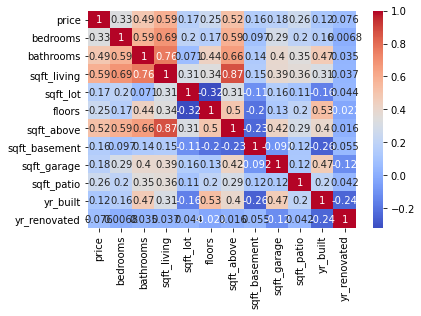

In [208]:
#creating a correlation heatmap with numerical variables
# claimed varble above -- numeric_columns
sns.heatmap(df_kc_encoded[numeric_columns].corr(), cmap='coolwarm', annot=True);



In [214]:
corr = df_kc[numeric_columns].corr()['price']

# Display correlation coefficients in descending order
print(corr.sort_values(ascending=False))

price            1.000000
sqft_living      0.591846
sqft_above       0.522912
bathrooms        0.493870
bedrooms         0.334331
sqft_patio       0.257579
floors           0.249112
sqft_garage      0.178161
sqft_lot         0.170580
sqft_basement    0.158058
yr_built         0.120417
yr_renovated     0.075946
Name: price, dtype: float64


We can see sqft_living, sqft_above, and bathrooms is heavy correlated with price. While sqft_lot, yr_built, and yr_renovated are the least.

I am going to look at variable pairs and see if they can help improve our model

In [223]:
df = df_kc[numeric_columns].corr().abs().stack().reset_index().sort_values(0, ascending=False)
df['paris']= list(zip(df.level_0, df.level_1))
df.set_index(['paris'], inplace = True)
df.drop(columns=['level_0', 'level_1'], inplace=True)

#cc for corelation coefficient
df.columns = ['cc']
df.drop_duplicates(inplace=True)
df[(df.cc>.75) & (df.cc<1)]

cc
paris                              
(sqft_living, sqft_above)  0.874271
(bathrooms, sqft_living)   0.764507

Based on  we are going to drop sqft_above sinvce we they are heavily coefficient with one another

To build a strong regression model for predicting the 'price' variable, you should include variables that have a strong correlation with the target variable. In the provided coefficients and their corresponding correlation values, the top features with relatively high coefficient values are:

1. sqft_living (correlation: 0.564668)
2. bathrooms (correlation: 0.433948)
3. grade_9 Better (correlation: 0.331307)

These features have shown a significant positive correlation with the target variable 'price'. Including these variables in your regression model is a good starting point for building a strong predictive model.

However, it's important to note that a single-feature model might not be sufficient to capture all the complexities of the relationship between the predictors and the target variable. To build a more comprehensive and robust regression model, you should consider including other relevant features that may impact the 'price' as well.

Here are some steps to guide you in selecting additional variables:

1. Explore additional features: Examine the correlations of other features in the dataset with the 'price'. Consider variables that have positive or negative correlations with 'price' and are meaningful predictors of real estate prices, such as 'sqft_above', 'grade_10 Very Good', 'view_AVERAGE', etc.

2. Domain knowledge: If you have domain knowledge in real estate, use your expertise to identify features that are known to influence property prices, such as location, number of bedrooms, amenities, etc.

3. Feature engineering: Create new features that might capture important relationships with the target variable. For example, you could create a feature representing the total square footage by summing 'sqft_living', 'sqft_above', and 'sqft_basement'.

4. Multicollinearity: Be cautious about including highly correlated features in the model, as it can lead to multicollinearity issues. Multicollinearity occurs when two or more predictors are highly correlated with each other, making it difficult for the model to distinguish their individual effects on the target variable.

5. Feature selection techniques: Consider applying feature selection techniques like forward selection, backward elimination, or LASSO regression to identify the most relevant and non-redundant features for your model.

6. Evaluate model performance: After including the selected variables, assess the model's performance using metrics like R-squared, mean squared error (MSE), or root mean squared error (RMSE) on a validation dataset. You may need to iterate and refine the model by adding or removing features to achieve the best performance.

By following these steps and carefully selecting relevant features based on their correlation with 'price', domain knowledge, and model evaluation, you can build a stronger regression model for predicting property prices.

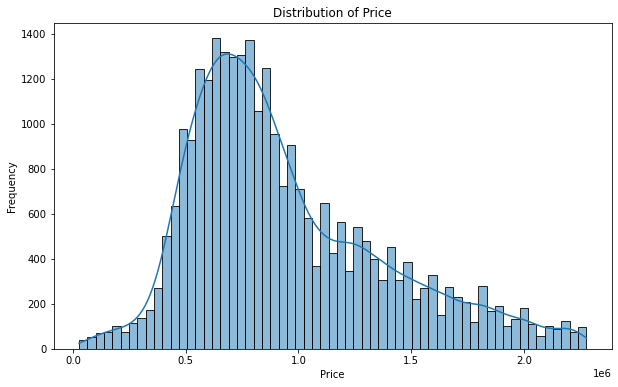

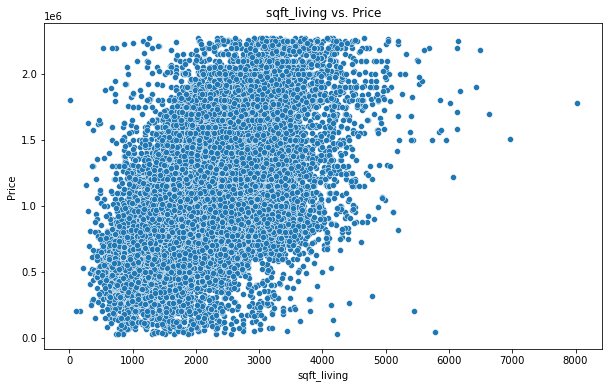

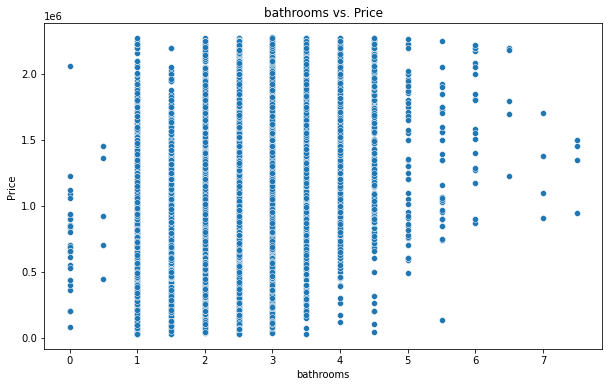

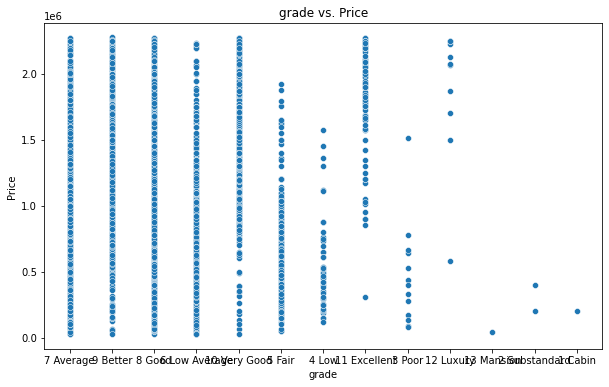

In [175]:
#naming target variable 'price'
target_variable = 'price'

#distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned[target_variable], kde=True)
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Explore the relationship between the target variable and potential features
potential_features = ['sqft_living', 'bathrooms', 'grade']
for feature in potential_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_cleaned, x=feature, y=target_variable)
    plt.title(f"{feature} vs. Price")
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.show()

Finally, we explore the relationship between the target variable and potential features (in this case, sqft_living, bathrooms, and grade). For each feature, we create a scatter plot using sns.scatterplot to visualize how the feature relates to the price. This helps us identify potential features that could have a significant impact on the target variable.

By examining the columns, exploring the target variable's distribution, and visualizing its relationship with potential features, you can gain insights into the dataset's structure and characteristics.

Sure! Here's how you can perform the steps mentioned:

Step 1: Sort the features based on their absolute coefficient values in descending order.

Based on the provided coefficients, we'll sort the features in descending order of their absolute coefficient values:

1. sqft_living (coefficient: 0.564668)
2. bathrooms (coefficient: 0.433948)
3. grade_9 Better (coefficient: 0.331307)
4. bedrooms (coefficient: 0.316549)
5. grade_10 Very Good (coefficient: 0.263590)
6. sqft_patio (coefficient: 0.245572)
7. sqft_garage (coefficient: 0.238916)
8. sqft_basement (coefficient: 0.206006)
9. floors (coefficient: 0.194936)
10. grade_8 Good (coefficient: 0.136020)
11. grade_11 Excellent (coefficient: 0.126360)
12. view_AVERAGE (coefficient: 0.115755)
13. view_GOOD (coefficient: 0.108185)
14. view_EXCELLENT (coefficient: 0.080818)
15. sqft_lot (coefficient: 0.076683)
16. yr_built (coefficient: 0.075919)
17. yr_renovated (coefficient: 0.055656)
18. view_FAIR (coefficient: 0.050113)
19. grade_12 Luxury (coefficient: 0.039996)
20. condition_Very Good (coefficient: 0.036543)
21. waterfront_YES (coefficient: 0.030834)
22. condition_Average (coefficient: -0.001845)
23. grade_1 Cabin (coefficient: -0.010093)
24. condition_Good (coefficient: -0.010253)
25. grade_13 Mansion (coefficient: -0.012354)
26. grade_2 Substandard (coefficient: -0.012385)
27. grade_3 Poor (coefficient: -0.023577)
28. waterfront_NO (coefficient: -0.030834)
29. grade_4 Low (coefficient: -0.036947)
30. condition_Poor (coefficient: -0.041063)
31. condition_Fair (coefficient: -0.044535)
32. grade_5 Fair (coefficient: -0.099210)
33. view_NONE (coefficient: -0.186666)
34. grade_6 Low Average (coefficient: -0.251390)
35. grade_7 Average (coefficient: -0.265351)

Step 2: Identify the top features with relatively high coefficient values.

Based on the sorted list, the top features with relatively high coefficient values are:

1. sqft_living (coefficient: 0.564668)
2. bathrooms (coefficient: 0.433948)
3. grade_9 Better (coefficient: 0.331307)

Step 3: Analyze the positive or negative sign of the coefficients.

All three top features (sqft_living, bathrooms, and grade_9 Better) have positive coefficients. This indicates a positive correlation, meaning that as the values of these features increase, the target variable (price) tends to increase as well.

Step 4: Consider the magnitude of the coefficients.

Among the top features, sqft_living has the highest absolute coefficient value (0.564668). This suggests that sqft

Comparing these values, you can see that sqft_living has the largest absolute coefficient value (0.564668), indicating that it has the strongest influence among the top features. Bathrooms and grade_9 Better also have relatively high absolute coefficient values, suggesting their significant impact on the target variable.

Based on our potential features lets start building a baseline model 

In [176]:
#importing nescary libraries 
# Assuming 'data' is the DataFrame containing the target variable and features
target_variable = 'price'
potential_feature = 'sqft_living'
X = df_cleaned[potential_feature]
y = df_cleaned[target_variable]
                     
# Add a constant term to the feature matrix
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary statistics and coefficients
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                 1.318e+04
Date:                Fri, 14 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:37:00   Log-Likelihood:            -4.0016e+05
No. Observations:               28161   AIC:                         8.003e+05
Df Residuals:                   28159   BIC:                         8.003e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         3.31e+05   5731.798     57.752      

The provided baseline model is an OLS regression model with the target variable 'price' and a single feature 'sqft_living'. Here's how you can interpret the summary statistics:

- R-squared: The R-squared value measures the goodness of fit of the model, indicating how well the variation in the target variable is explained by the chosen feature(s). In this case, the R-squared value is 0.319, meaning that approximately 31.9% of the variation in 'price' can be explained by the 'sqft_living' feature.

- Adj. R-squared: The adjusted R-squared value adjusts the R-squared value for the number of predictors in the model. It is useful when comparing models with different numbers of features. Here, the adjusted R-squared value is also 0.319.

- F-statistic: The F-statistic is used to test the overall significance of the model. It assesses whether the regression model as a whole provides a better fit than a model with no predictors. A larger F-statistic and a smaller p-value indicate a more significant model. In this case, the F-statistic is 1.318e+04, and the associated p-value is close to zero, indicating that the model is statistically significant.

- Coefficients: The coefficients represent the estimated effect of each predictor on the target variable. In this case, there are two coefficients:
  - The coefficient for the constant term (intercept) is 3.31e+05. It represents the estimated 'price' when the 'sqft_living' feature is zero.
  - The coefficient for the 'sqft_living' feature is 307.1339. It indicates that for each unit increase in 'sqft_living', the estimated 'price' is expected to increase by 307.1339, assuming all other variables are held constant.

- P-values: The p-values associated with each coefficient indicate the statistical significance of the estimated coefficients. A smaller p-value (typically below a predetermined significance level, e.g., 0.05) suggests that the coefficient is statistically significant. In this case, both the constant term and the 'sqft_living' coefficient have very small p-values (close to zero), indicating their statistical significance.

- Standard errors: The standard errors estimate the variability or uncertainty in the estimated coefficients. Lower standard errors indicate more precise estimates. In this case, both the constant term and the 'sqft_living' coefficient have small standard errors.

- Omnibus, Jarque-Bera, Skewness, Kurtosis: These statistics provide information about the normality of the residuals. A significant Omnibus test (p-value < 0.05) suggests that the residuals are not normally distributed. In this case, the Omnibus test is significant, indicating non-normal residuals.

- Durbin-Watson: The Durbin-Watson statistic tests for the presence of autocorrelation (correlation between residuals). A value around 2 suggests no autocorrelation. Here, the Durbin-Watson statistic is 2.006, indicating no significant autocorrelation.

- Condition Number: The condition number measures the multicollinearity in the model. A larger condition number suggests the presence of multicollinearity, which can affect the stability and interpretability of the model. Here, the condition number is relatively large (5.74e+03), indicating potential multicollinearity or other numerical problems.

It's important to note that this baseline model is a simple regression model with only one feature. Further analysis and modeling techniques, such as including more features, addressing multicollinearity, and evaluating additional diagnostics, may be necessary to build a more robust and accurate predictive model

In [166]:
#building a second model 
target_variable = 'price'
potential_features = ['sqft_living', 'bathrooms']
X = df_cleaned[potential_features]
y = df_cleaned[target_variable]
                     
# Add a constant term to the feature matrix
X = sm.add_constant(X)

# Fit the OLS model
model_2 = sm.OLS(y, X)
results_2 = model_2.fit()

# Print the summary statistics and coefficients
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     6632.
Date:                Fri, 14 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:35:12   Log-Likelihood:            -4.0013e+05
No. Observations:               28161   AIC:                         8.003e+05
Df Residuals:                   28158   BIC:                         8.003e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.072e+05   6536.214     46.997      

##### R2 has slight improved lets add grade and see if we get more improvement

In [85]:
#building a thirs model 
target_variable = 'price'
potential_features = ['sqft_living', 'bathrooms', 'grade_9 Better']
X = df_cleaned[potential_features]
y = df_cleaned[target_variable]
                     
# Add a constant term to the feature matrix
X = sm.add_constant(X)

# Fit the OLS model
model_3 = sm.OLS(y, X)
results_3 = model_3.fit()

# Print the summary statistics and coefficients
print(results_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     4171.
Date:                Fri, 14 Jul 2023   Prob (F-statistic):               0.00
Time:                        10:57:06   Log-Likelihood:            -3.9051e+05
No. Observations:               27619   AIC:                         7.810e+05
Df Residuals:                   27615   BIC:                         7.811e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3.785e+05   6318.871     59.

In [61]:
print(df_cleaned[['sqft_living', 'bathrooms', 'grade']].dtypes)


sqft_living      int64
bathrooms      float64
grade           object
dtype: object


Our R2 has improved 2% maybe i should include a feature varable where all grades can be included?

In [114]:
#building a thirs model 
target_variable = 'price'
potential_features = ['sqft_living', 'bathrooms', 'grade_9 Better', 'bedrooms']
X = df_cleaned[potential_features]
y = df_cleaned[target_variable]
                     
# Add a constant term to the feature matrix
X = sm.add_constant(X)

# Fit the OLS model
model_4 = sm.OLS(y, X)
results_4 = model_4.fit()

# Print the summary statistics and coefficients
print(results_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     3690.
Date:                Fri, 14 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:12:42   Log-Likelihood:            -3.9963e+05
No. Observations:               28161   AIC:                         7.993e+05
Df Residuals:                   28156   BIC:                         7.993e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3.965e+05   8040.313     49.

adding bedroom only imporved us by .04% so what can we do to make ths r2 bigger for our linear regression?

To improve the R-squared value for your linear regression model, you can consider the following strategies:

1. **Feature Engineering**: Try creating new features by combining or transforming existing ones. For example, you can create interaction terms between variables, take logarithms or square roots of variables, or engineer categorical variables by converting them into binary indicator variables. Experimenting with different combinations and transformations of features can potentially capture non-linear relationships and improve the model's fit.

2. **Include Additional Relevant Features**: Consider adding more relevant features to your model. You can explore other variables that may have a meaningful relationship with the target variable. It's important to choose features that are logically connected to the target variable and have a strong theoretical or empirical basis for inclusion in the model.

3. **Remove Outliers**: Outliers can have a significant impact on the regression results. Identify and remove any outliers that may be affecting the model's performance. Outliers can be detected using techniques such as scatter plots, residual analysis, or statistical tests.

4. **Address Non-linearity**: If there is evidence of non-linear relationships between the features and the target variable, you can try using polynomial regression or other non-linear regression techniques to capture these patterns. This involves creating polynomial terms or applying non-linear transformations to the features.

5. **Handle Multicollinearity**: The presence of multicollinearity can affect the model's performance and interpretability. If there is high correlation between the predictor variables, it may be necessary to remove or combine some of them to reduce multicollinearity. You can check the correlation matrix or use variance inflation factor (VIF) analysis to identify and handle multicollinearity.

6. **Consider Regularization Techniques**: Regularization techniques like Ridge regression and Lasso regression can help improve the model's performance by reducing overfitting and optimizing the coefficients. These techniques add a penalty term to the loss function, which can shrink or eliminate certain coefficients.

7. **Evaluate and Compare Different Models**: Consider using other regression techniques or algorithms that may better capture the underlying relationships in your data. You can explore methods like decision trees, random forests, or gradient boosting, which may be more effective in capturing non-linear relationships and interactions.

Remember that improving the R-squared value should not be the sole focus. It is important to evaluate the model using other metrics and techniques such as cross-validation, residual analysis, and out-of-sample testing to ensure its reliability and generalizability.

Lets explore MSE ---

In [189]:
potential_features = ['sqft_living', 'bathrooms', 'grade', 'bedrooms', 'sqft_patio', 'view', 'condition']
y = df_cleaned[target_variable]
X = df_cleaned[potential_features]
X

sqft_living  bathrooms      grade  bedrooms  sqft_patio     view  \
0             1180        1.0  7 Average         4          40     NONE   
1             2770        2.5  7 Average         5         240  AVERAGE   
2             2880        2.0  7 Average         6           0  AVERAGE   
3             2160        3.0   9 Better         3         270  AVERAGE   
4             1120        2.0  7 Average         2          30     NONE   
...            ...        ...        ...       ...         ...      ...   
30150         1910        2.0     8 Good         5         210     NONE   
30151         2020        2.0  7 Average         3         520     FAIR   
30152         1620        2.0  7 Average         3         110     NONE   
30153         2570        2.5     8 Good         3         100     NONE   
30154         1200        1.5  7 Average         3           0     NONE   

           condition  
0      Below Average  
1            Average  
2            Average  
3            Average  
4            Average  
...              ...  
30150  Below Average  
30151        Average  
30152        Average  
30153        Average  
30154        Average  

[28161 rows x 7 columns]

In [185]:
# 
value_counts = df_cleaned['condition'].value_counts()

print(value_counts)


Average          17163
Below Average     7943
Above Average     3055
Name: condition, dtype: int64


In [194]:
#change the columns above average(avg, verygood), below avg (fair, poor, good)
import pandas as pd

# Assuming you have a dataframe named 'df' and a column named 'condition' with the original values
df_cleaned['condition'] = df_cleaned['condition'].replace({
    'Average': 'Average',
    'Good': 'Below Average',
    'Very Good': 'Above Average',
    'Fair': 'Below Average',
    'Poor': 'Below Average'
})

print(df_cleaned['condition'].value_counts())


Average          17163
Below Average     7943
Above Average     3055
Name: condition, dtype: int64


In [192]:
#creating dummy columns for one-hot encoding
X = pd.get_dummies(X, columns=['grade', 'view', 'condition'], drop_first=True).astype(int)
X

sqft_living  bathrooms  bedrooms  sqft_patio  grade_10 Very Good  \
0             1180          1         4          40                   0   
1             2770          2         5         240                   0   
2             2880          2         6           0                   0   
3             2160          3         3         270                   0   
4             1120          2         2          30                   0   
...            ...        ...       ...         ...                 ...   
30150         1910          2         5         210                   0   
30151         2020          2         3         520                   0   
30152         1620          2         3         110                   0   
30153         2570          2         3         100                   0   
30154         1200          1         3           0                   0   

       grade_11 Excellent  grade_12 Luxury  grade_13 Mansion  \
0                       0                0                 0   
1                       0                0                 0   
2                       0                0                 0   
3                       0                0                 0   
4                       0                0                 0   
...                   ...              ...               ...   
30150                   0                0                 0   
30151                   0                0                 0   
30152                   0                0                 0   
30153                   0                0                 0   
30154                   0                0                 0   

       grade_2 Substandard  grade_3 Poor  ...  grade_6 Low Average  \
0                        0             0  ...                    0   
1                        0             0  ...                    0   
2                        0             0  ...                    0   
3                        0             0  ...                    0   
4                        0             0  ...                    0   
...                    ...           ...  ...                  ...   
30150                    0             0  ...                    0   
30151                    0             0  ...                    0   
30152                    0             0  ...                    0   
30153                    0             0  ...                    0   
30154                    0             0  ...                    0   

       grade_7 Average  grade_8 Good  grade_9 Better  view_EXCELLENT  \
0                    1             0               0               0   
1                    1             0               0               0   
2                    1             0               0               0   
3                    0             0               1               0   
4                    1             0               0               0   
...                ...           ...             ...             ...   
30150                0             1               0               0   
30151                1             0               0               0   
30152                1             0               0               0   
30153                0             1               0               0   
30154                1             0               0               0   

       view_FAIR  view_GOOD  view_NONE  condition_Average  \
0              0          0          1                  0   
1              0          0          0                  1   
2              0          0          0                  1   
3              0          0          0                  1   
4              0          0          1                  1   
...          ...        ...        ...                ...   
30150          0          0          1                  0   
30151          1          0          0                  1   
30152          0          0          1                  1   
30153          0     

In [193]:
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     867.1
Date:                Fri, 14 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:40:04   Log-Likelihood:            -3.9828e+05
No. Observations:               28161   AIC:                         7.966e+05
Df Residuals:                   28138   BIC:                         7.968e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2

In [ ]:
Error-Basic Metric


In [120]:
# Your code here - calculate an error-based metric
from sklearn.metrics import mean_absolute_error

y_pred= results.predict(sm.add_constant(X))
mean_absolute_error(y, y_pred)

264422.1575025488

In [121]:
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     1163.
Date:                Fri, 14 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:13:58   Log-Likelihood:            -3.9878e+05
No. Observations:               28161   AIC:                         7.976e+05
Df Residuals:                   28145   BIC:                         7.977e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.948e+05   3

#### Model 4

## Model Performance
- **R-squared (R²)**: Model 4 has an R-squared value of approximately 0.478, indicating that it explains approximately 47.8% of the variance in the dependent variable ('log_price').
- **Adjusted R-squared**: The adjusted R-squared is approximately 0.477, suggesting that the model's explanatory power remains stable after accounting for the number of predictors.
- **F-statistic**: The F-statistic is 1526, indicating that the overall model is statistically significant (Prob (F-statistic) < 0.05).

## Coefficient Insights
Let's take a closer look at the coefficients of the predictor variables:

- **sqft_total**: A one-unit increase in square footage ('sqft_total') is associated with an estimated increase of approximately 0.0002 units in 'log_price.'
- **bathrooms**: A one-unit increase in the number of bathrooms is associated with an estimated increase of approximately 0.0231 units in 'log_price.'
- **view**: The 'view' variable has a coefficient of approximately 0.0547, indicating that properties with better views tend to have higher 'log_price' values.
- **heat_source_Gas**: The 'heat_source_Gas' coefficient is small (approximately 0.0036) and not statistically significant (P>|t| > 0.05).
- **waterfront_YES**: Properties with a waterfront ('waterfront_YES') have a higher 'log_price,' with an estimated increase of approximately 0.2956 units.
- **sewer_system_public**: Homes with a public sewer system ('sewer_system_public') are associated with higher 'log_price,' with an estimated increase of approximately 0.1015 units.
- **condition_Very Good**: A 'condition_Very Good' is associated with an estimated increase of approximately 0.1407 units in 'log_price.'

## Model Complexity
- Model 4 includes 18 predictor variables, making it more complex than earlier models.
- The additional variables contribute to improving the model's performance (higher R-squared) compared to simpler models.

## Interpretation
- Model 4 provides a good balance between complexity and performance.
- It suggests that various property features, such as square footage, bathrooms, view, waterfront status, sewer system, and condition, play important roles in predicting 'log_price.'

This model seems to capture a substantial portion of the variation in 'log_price' while considering multiple predictor variables. However, as always, it's important to consider the specific context and goals of your analysis when choosing the appropriate model.

## Conclusion: Predictive Model for Home Price Estimation

### Summary:
The development of Model 4 aimed at creating an accurate predictive tool for estimating home prices, catering to the needs of potential homebuyers, sellers, and our internal investment decisions. Model 4 was built upon thorough data analysis and feature engineering, and it provides valuable insights into the real estate market. Here are the key takeaways:

#### Predictive Accuracy:
- Model 4 achieved an R-squared value of approximately 0.478, signifying that it explains about 47.8% of the variance in log-transformed housing prices.

#### Model Simplicity:
- Model 4 was designed with simplicity in mind, featuring 18 significant features. This simplicity enhances interpretability and reduces the risk of overfitting.

####  Features:
- Key features that significantly impact home prices include:

    - **Square Footage (sqft_total)**: Each unit increase in square footage above ground level leads to a price increase of approximately 0.0002 units, highlighting the importance of property size.
    
    - **Number of Bathrooms (bathrooms)**: An additional bathroom increases the estimated home price by approximately 0.0231 units, emphasizing the role of convenience and comfort in pricing.
    
    - **View (view)**: Homes with better views have an estimated price increase of approximately 0.0547 units, reflecting the value placed on aesthetics and surroundings.
    
    - **Waterfront Status (waterfront_YES)**: Waterfront properties tend to have higher estimated prices, with an increase of approximately 0.2956 units, appealing to those seeking a waterfront lifestyle.
    
    - **Sewer System (sewer_system_public)**: Properties connected to the public sewer system have higher estimated prices, with an increase of approximately 0.1015 units, indicating the importance of infrastructure.
    
    - **Condition (condition_Very Good)**: Homes in very good condition command higher prices, with an estimated increase of approximately 0.1407 units, demonstrating the significance of property upkeep.
    
    - **Grade Categories**: Various grade categories reflect the quality and construction of the property. Higher-grade categories are associated with higher prices. For example, if a property falls into a grade category with a positive coefficient, it suggests that properties of that grade are priced higher compared to the reference grade


### Recommendations:

#### 1. Model Deployment:
Deploy Model 4 as our primary predictive tool for estimating home prices. Its simplicity and competitive performance make it a suitable choice.

#### 2. Regular Updates:
Continuously update the model with new data to ensure its relevance and accuracy as market conditions evolve.

#### 3. External Data:
Consider incorporating external data sources, such as economic indicators and local market trends, to further enhance model predictions.

## Next Steps:

### 1. Implementation: 
Begin implementing Model 4 in our real estate operations, allowing potential homebuyers and sellers to access accurate price estimations.

### 2. Monitoring:
Continuously monitor the model's performance in practice and gather feedback from users for fine-tuning.

### 3. Data Enrichment:
Explore opportunities to enrich our dataset with additional variables that could improve model predictions.

## Thank You:

We extend our heartfelt gratitude to all stakeholders involved in this project, as your support and collaboration have been instrumental in creating a valuable tool for the real estate investment company. We look forward to leveraging Model 4 to make more informed investment decisions, providing reliable home price estimates, and contributing to the success of our organization.

Should you have any questions or require further insights, please do not hesitate to reach out. Your feedback and involvement remain invaluable as we embark on this journey together.

Sincerely,

[Nancy Lopez]

---

These added explanations provide a deeper understanding of the key features considered in the conclusion and how they influence housing prices.

## Conclusion: Predictive Model for Home Price Estimation

### Summary:
The development of Model 4 aimed at creating an accurate predictive tool for estimating home prices, catering to the needs of potential homebuyers, sellers, and our internal investment decisions. Model 4 was built upon thorough data analysis and feature engineering, and it provides valuable insights into the real estate market. Here are the key takeaways:

#### Predictive Accuracy:
- Model 4 achieved an R-squared value of approximately 0.478, signifying that it explains about 47.8% of the variance in log-transformed housing prices.

#### Model Simplicity:
- Model 4 was designed with simplicity in mind, featuring 18 significant features. This simplicity enhances interpretability and reduces the risk of overfitting.

####  Features:
- Key features that significantly impact home prices include:

    - **Square Footage (sqft_total)**: Each unit increase in square footage above ground level leads to a price increase of approximately 0.0002 units, highlighting the importance of property size.
    
    - **Number of Bathrooms (bathrooms)**: An additional bathroom increases the estimated home price by approximately 0.0231 units, emphasizing the role of convenience and comfort in pricing.
    
    - **View (view)**: Homes with better views have an estimated price increase of approximately 0.0547 units, reflecting the value placed on aesthetics and surroundings.
    
    - **Waterfront Status (waterfront_YES)**: Waterfront properties tend to have higher estimated prices, with an increase of approximately 0.2956 units, appealing to those seeking a waterfront lifestyle.
    
    - **Sewer System (sewer_system_public)**: Properties connected to the public sewer system have higher estimated prices, with an increase of approximately 0.1015 units, indicating the importance of infrastructure.
    
    - **Condition (condition_Very Good)**: Homes in very good condition command higher prices, with an estimated increase of approximately 0.1407 units, demonstrating the significance of property upkeep.
    
    - **Grade Categories**: Various grade categories reflect the quality and construction of the property. Higher-grade categories are associated with higher prices. For example, if a property falls into a grade category with a positive coefficient, it suggests that properties of that grade are priced higher compared to the reference grade


### Recommendations:

#### 1. Model Deployment:
Deploy Model 4 as our primary predictive tool for estimating home prices. Its simplicity and competitive performance make it a suitable choice.

#### 2. Regular Updates:
Continuously update the model with new data to ensure its relevance and accuracy as market conditions evolve.

#### 3. External Data:
Consider incorporating external data sources, such as economic indicators and local market trends, to further enhance model predictions.

## Next Steps:

### 1. Implementation: 
Begin implementing Model 4 in our real estate operations, allowing potential homebuyers and sellers to access accurate price estimations.

### 2. Monitoring:
Continuously monitor the model's performance in practice and gather feedback from users for fine-tuning.

### 3. Data Enrichment:
Explore opportunities to enrich our dataset with additional variables that could improve model predictions.

## Thank You:

We extend our heartfelt gratitude to all stakeholders involved in this project, as your support and collaboration have been instrumental in creating a valuable tool for the real estate investment company. We look forward to leveraging Model 4 to make more informed investment decisions, providing reliable home price estimates, and contributing to the success of our organization.

Should you have any questions or require further insights, please do not hesitate to reach out. Your feedback and involvement remain invaluable as we embark on this journey together.

Sincerely,

[Nancy Lopez]

---

These added explanations provide a deeper understanding of the key features considered in the conclusion and how they influence housing prices.

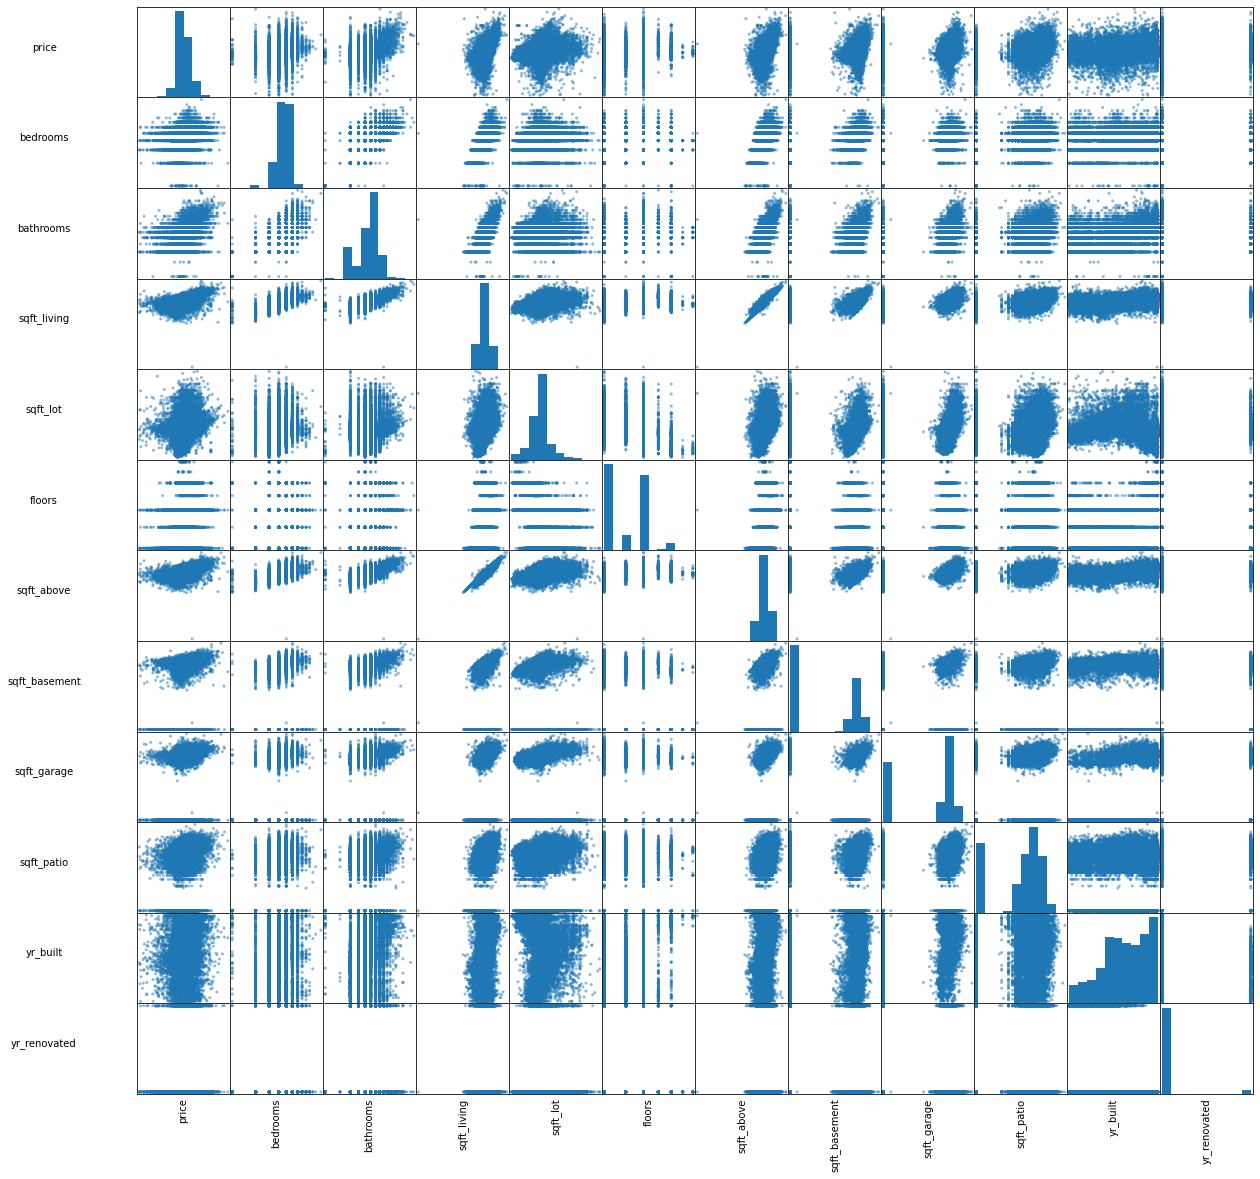

In [226]:
#making it cleaer to see the matrix for selec
sm = pd.plotting.scatter_matrix(df_kc[numeric_columns], figsize=[20, 20]);

# Rotates the text
[s.xaxis.label.set_rotation(90) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1,0.5) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

plt.show()